In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-15T03:35:22.884992+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.13.2
pandas    : 2.2.3
numpy     : 2.1.2
matplotlib: 3.9.2
teeplot   : 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-05-vanillasimplesingle-mut-screen"
teeplot_subdir


'2025-05-05-vanillasimplesingle-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/578kx/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
df["tb_stat"].unique()


['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']
Categories (7, object): ['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']

In [10]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [11]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=200, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 1080/1080 [00:14<00:00, 73.46it/s]


In [12]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


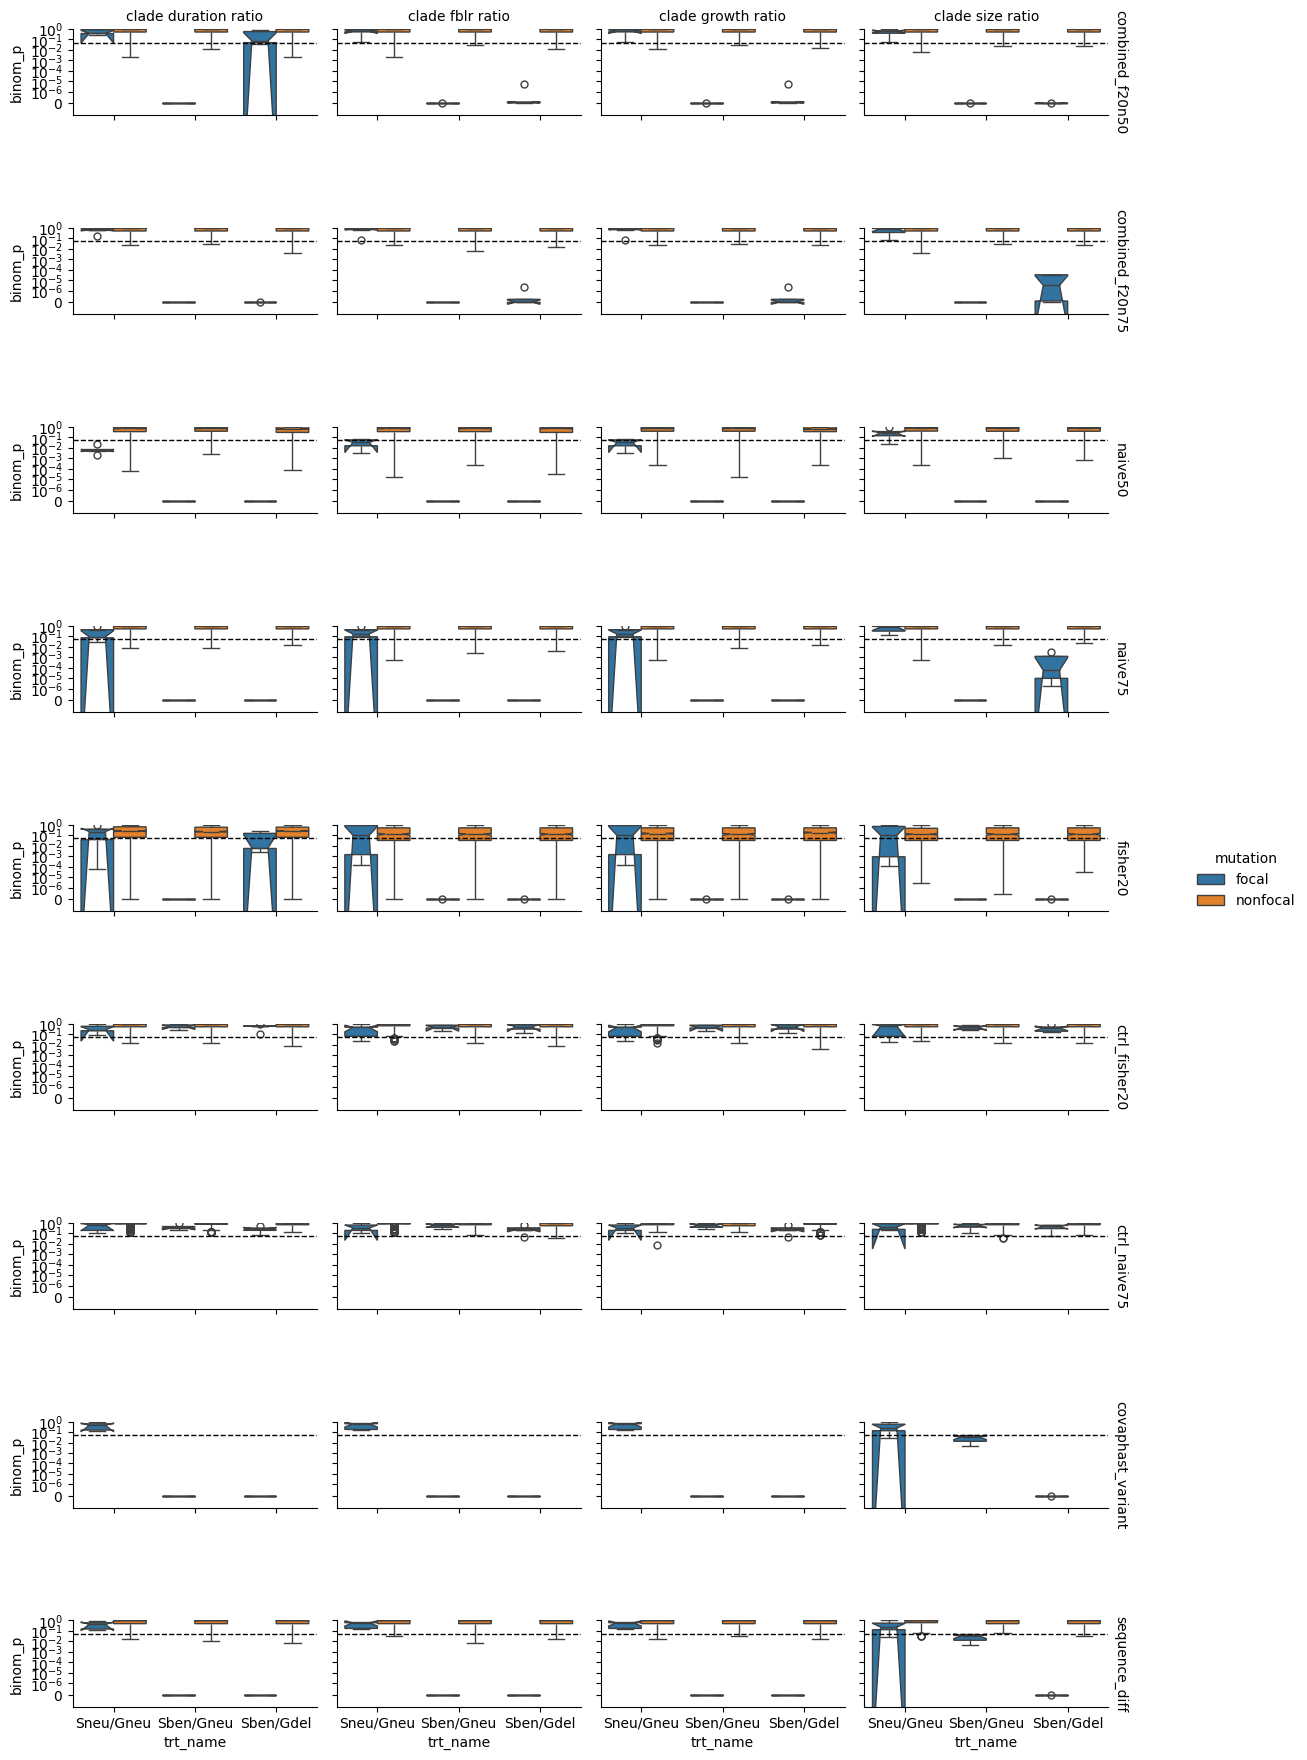

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


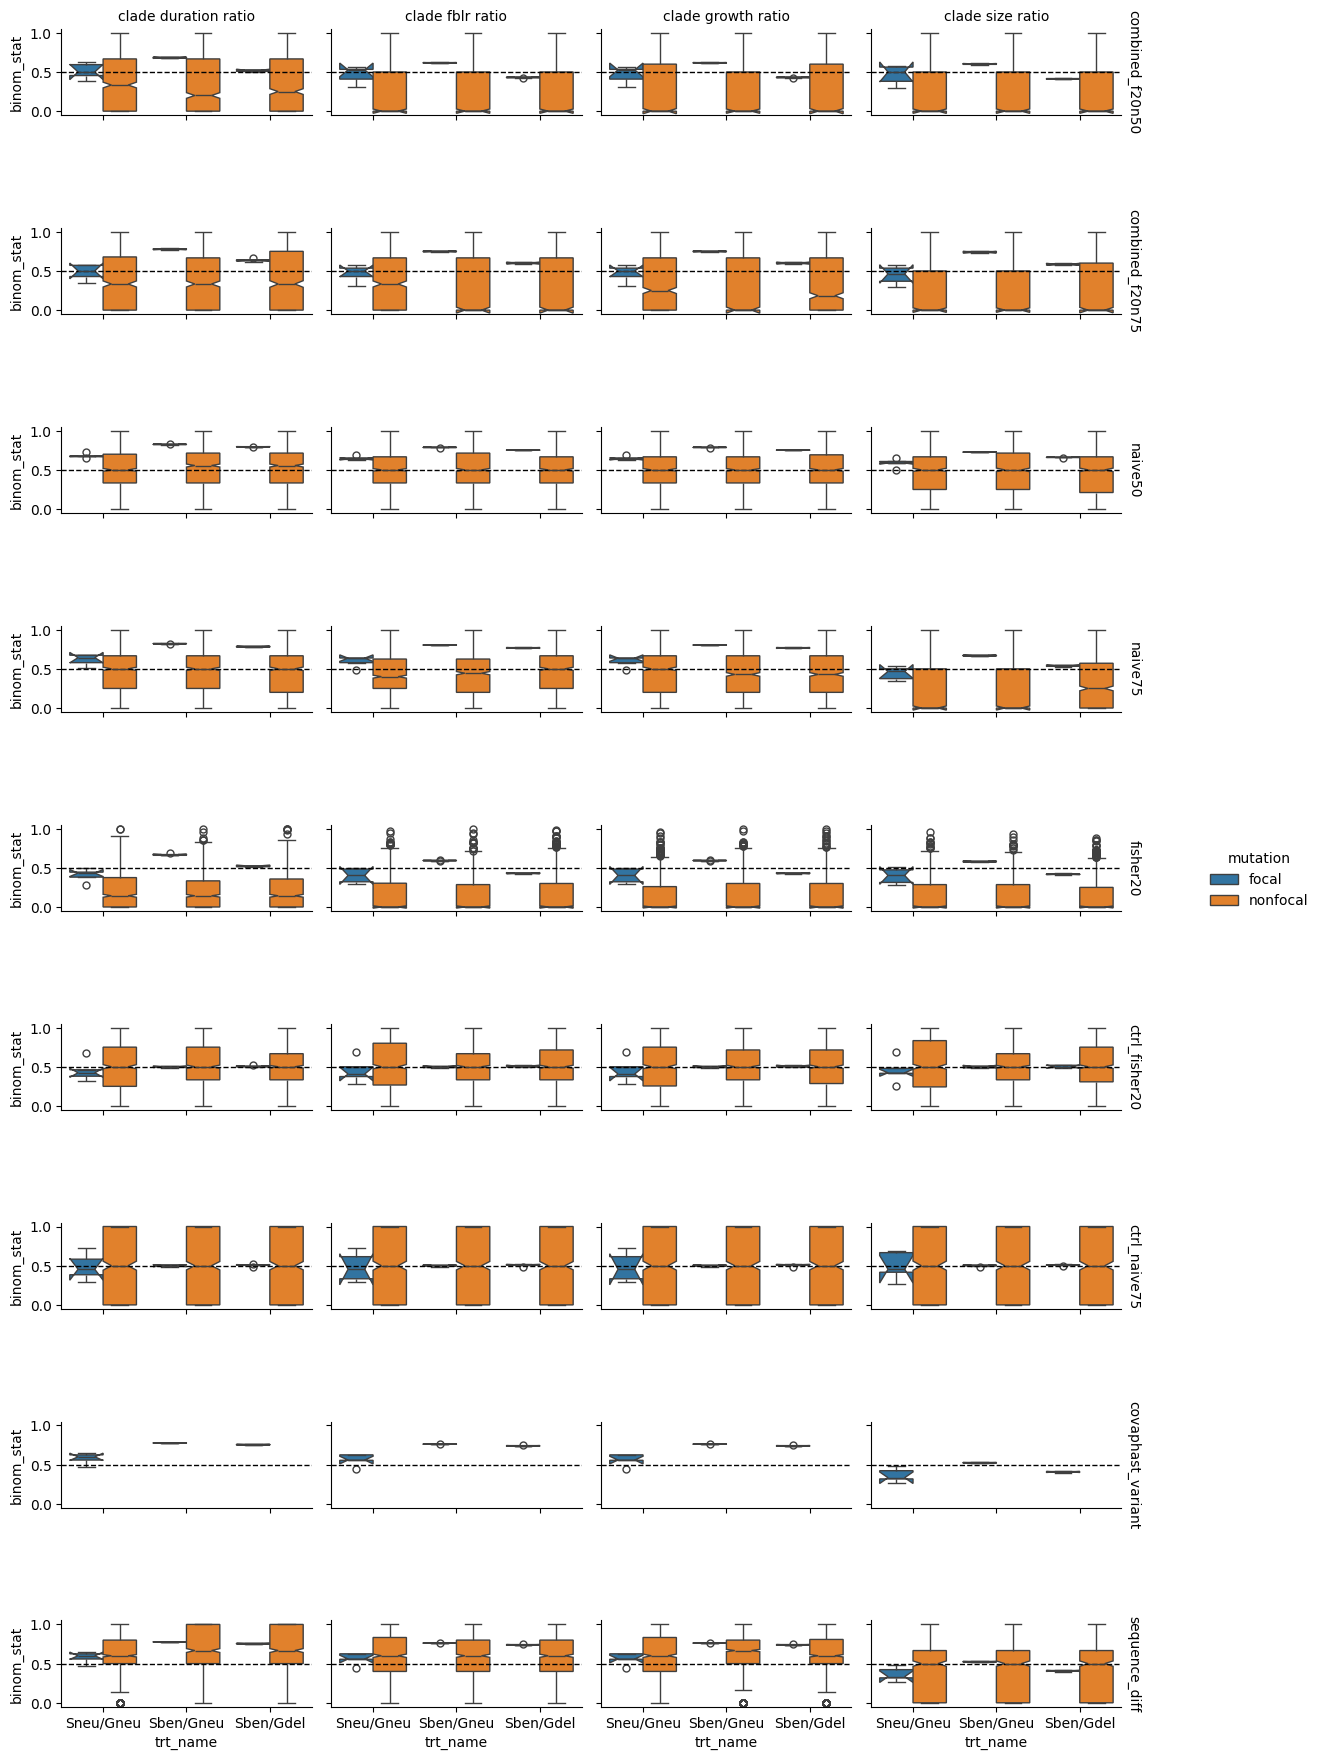

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


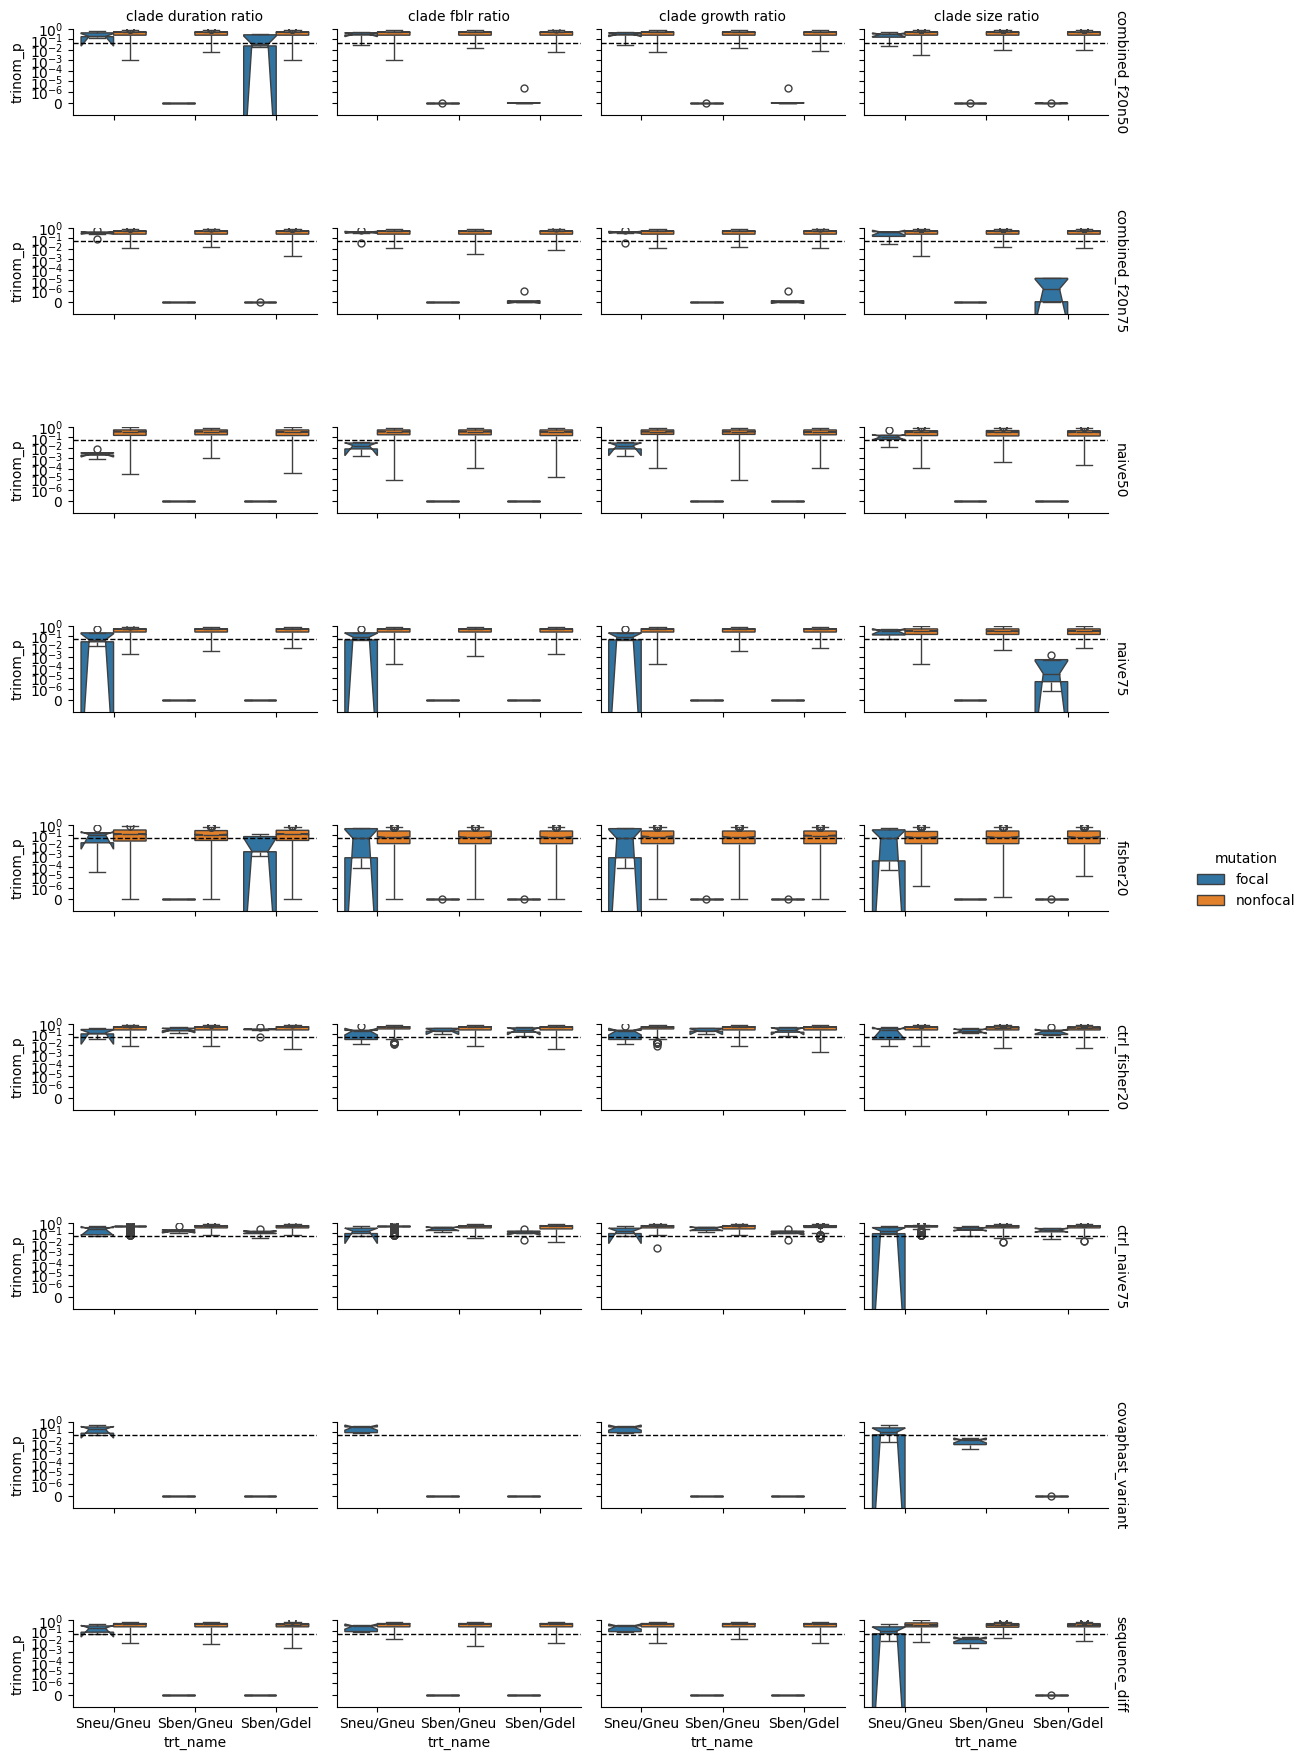

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


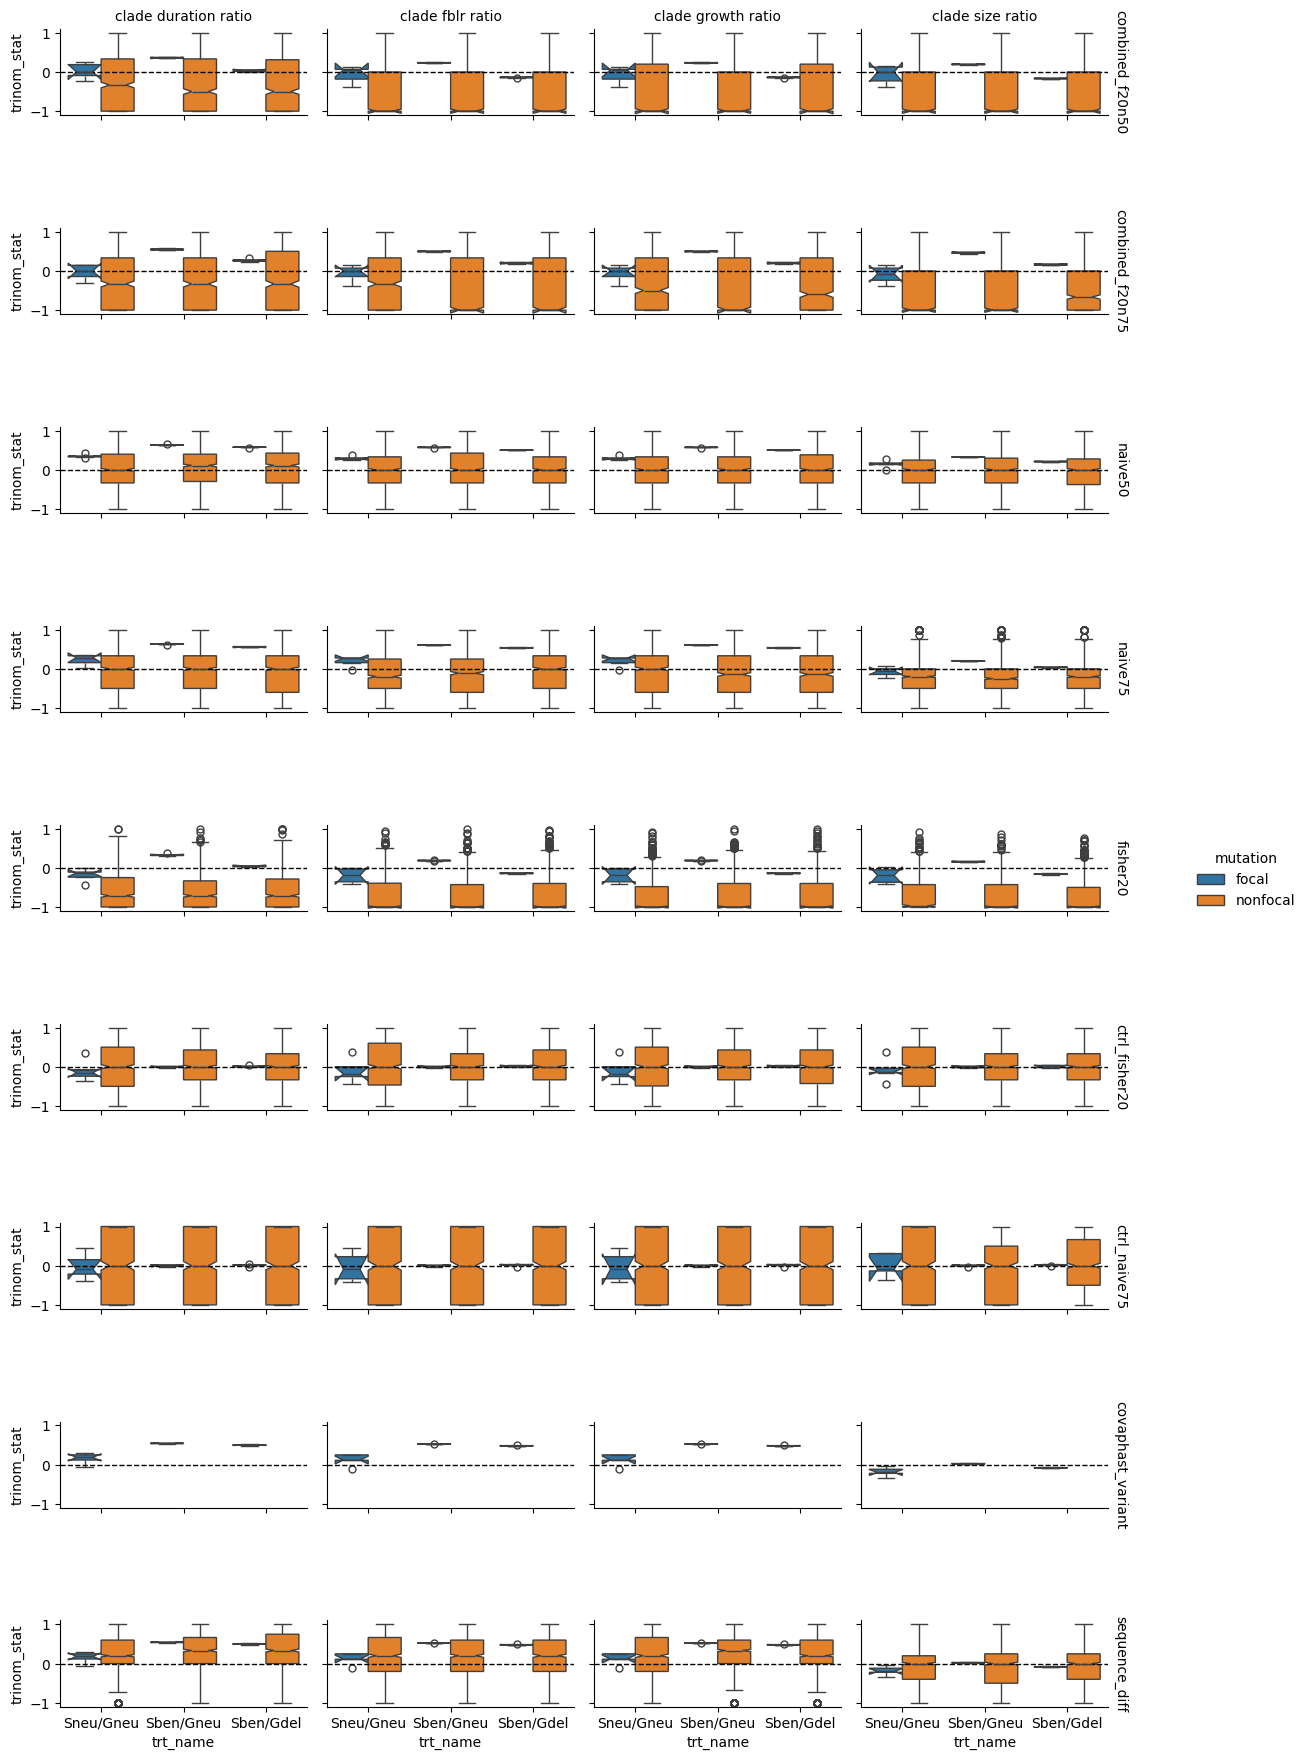

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


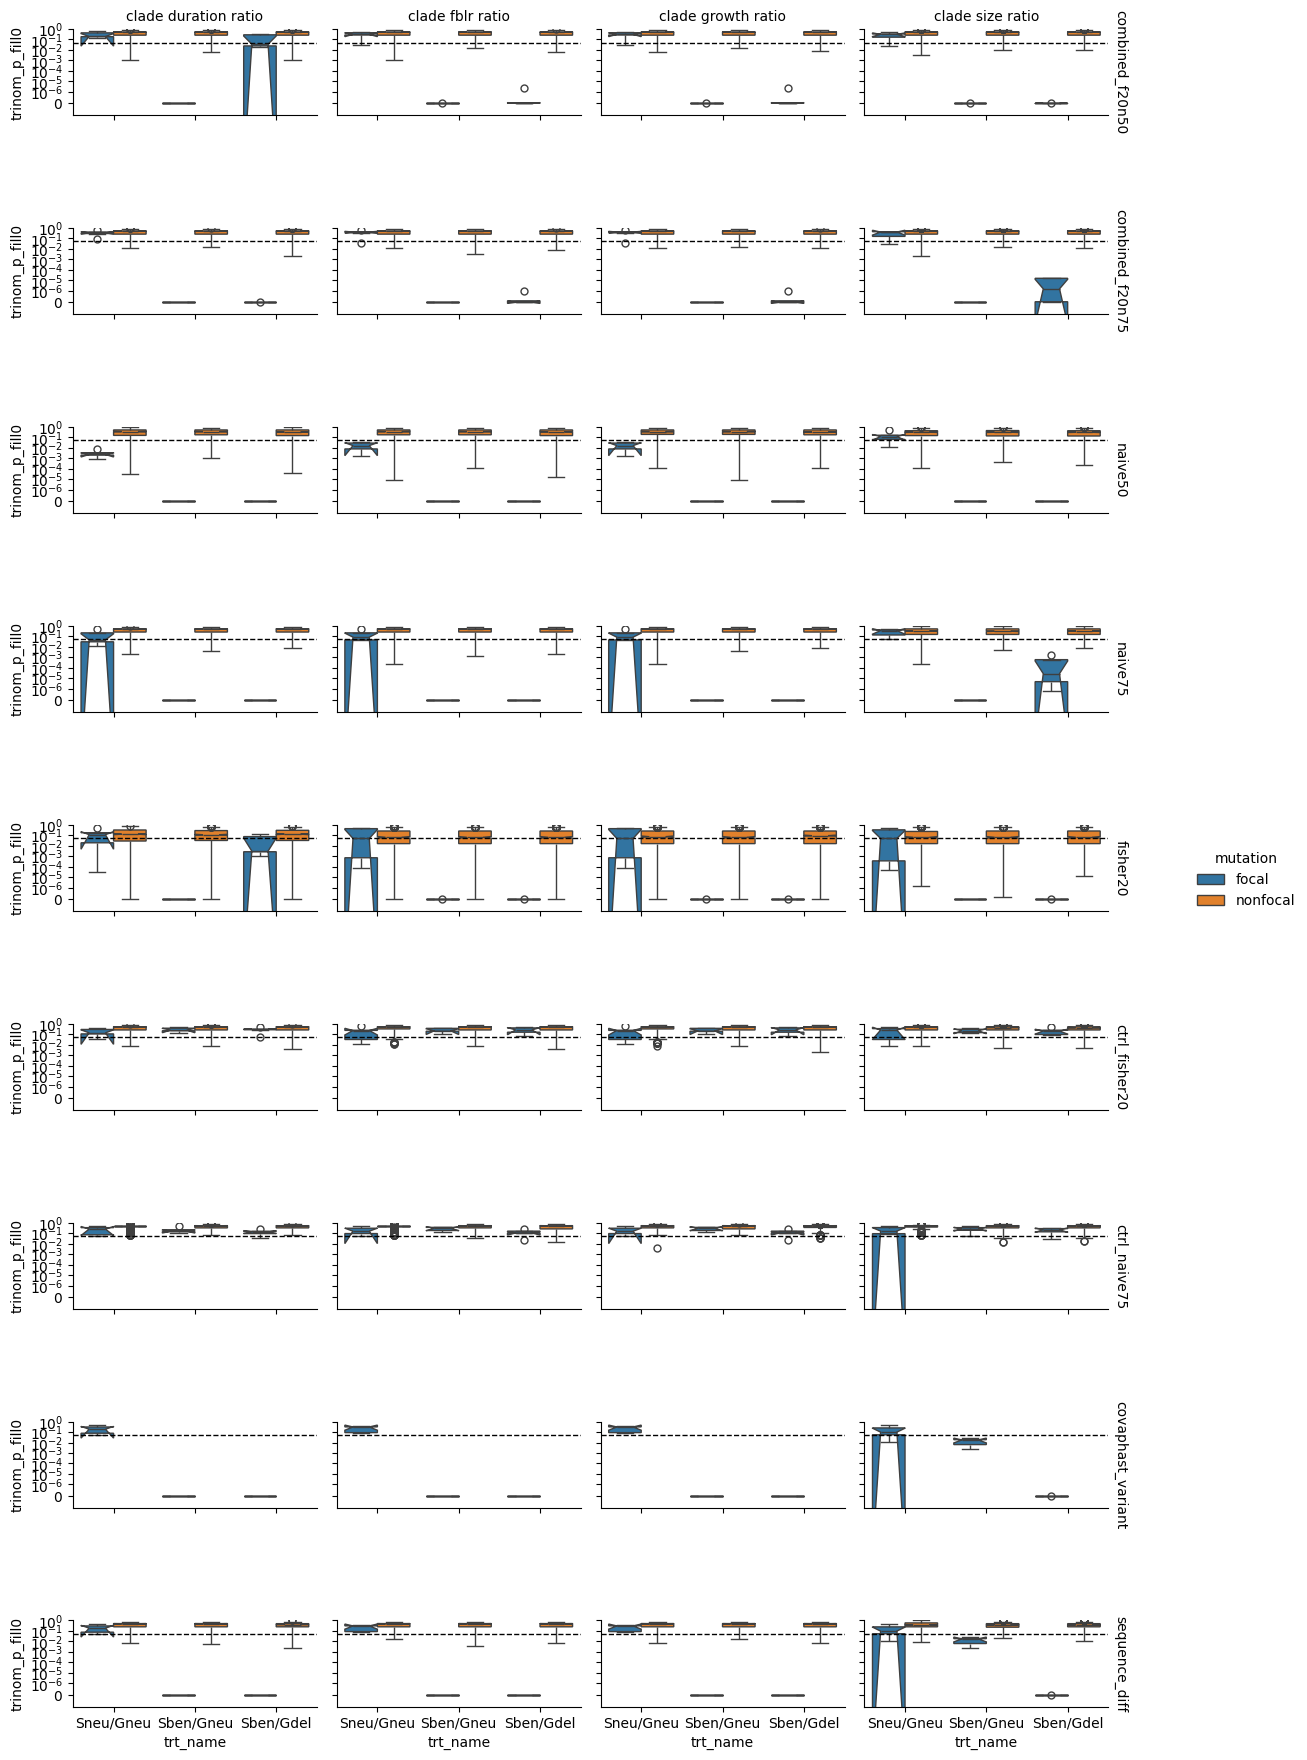

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


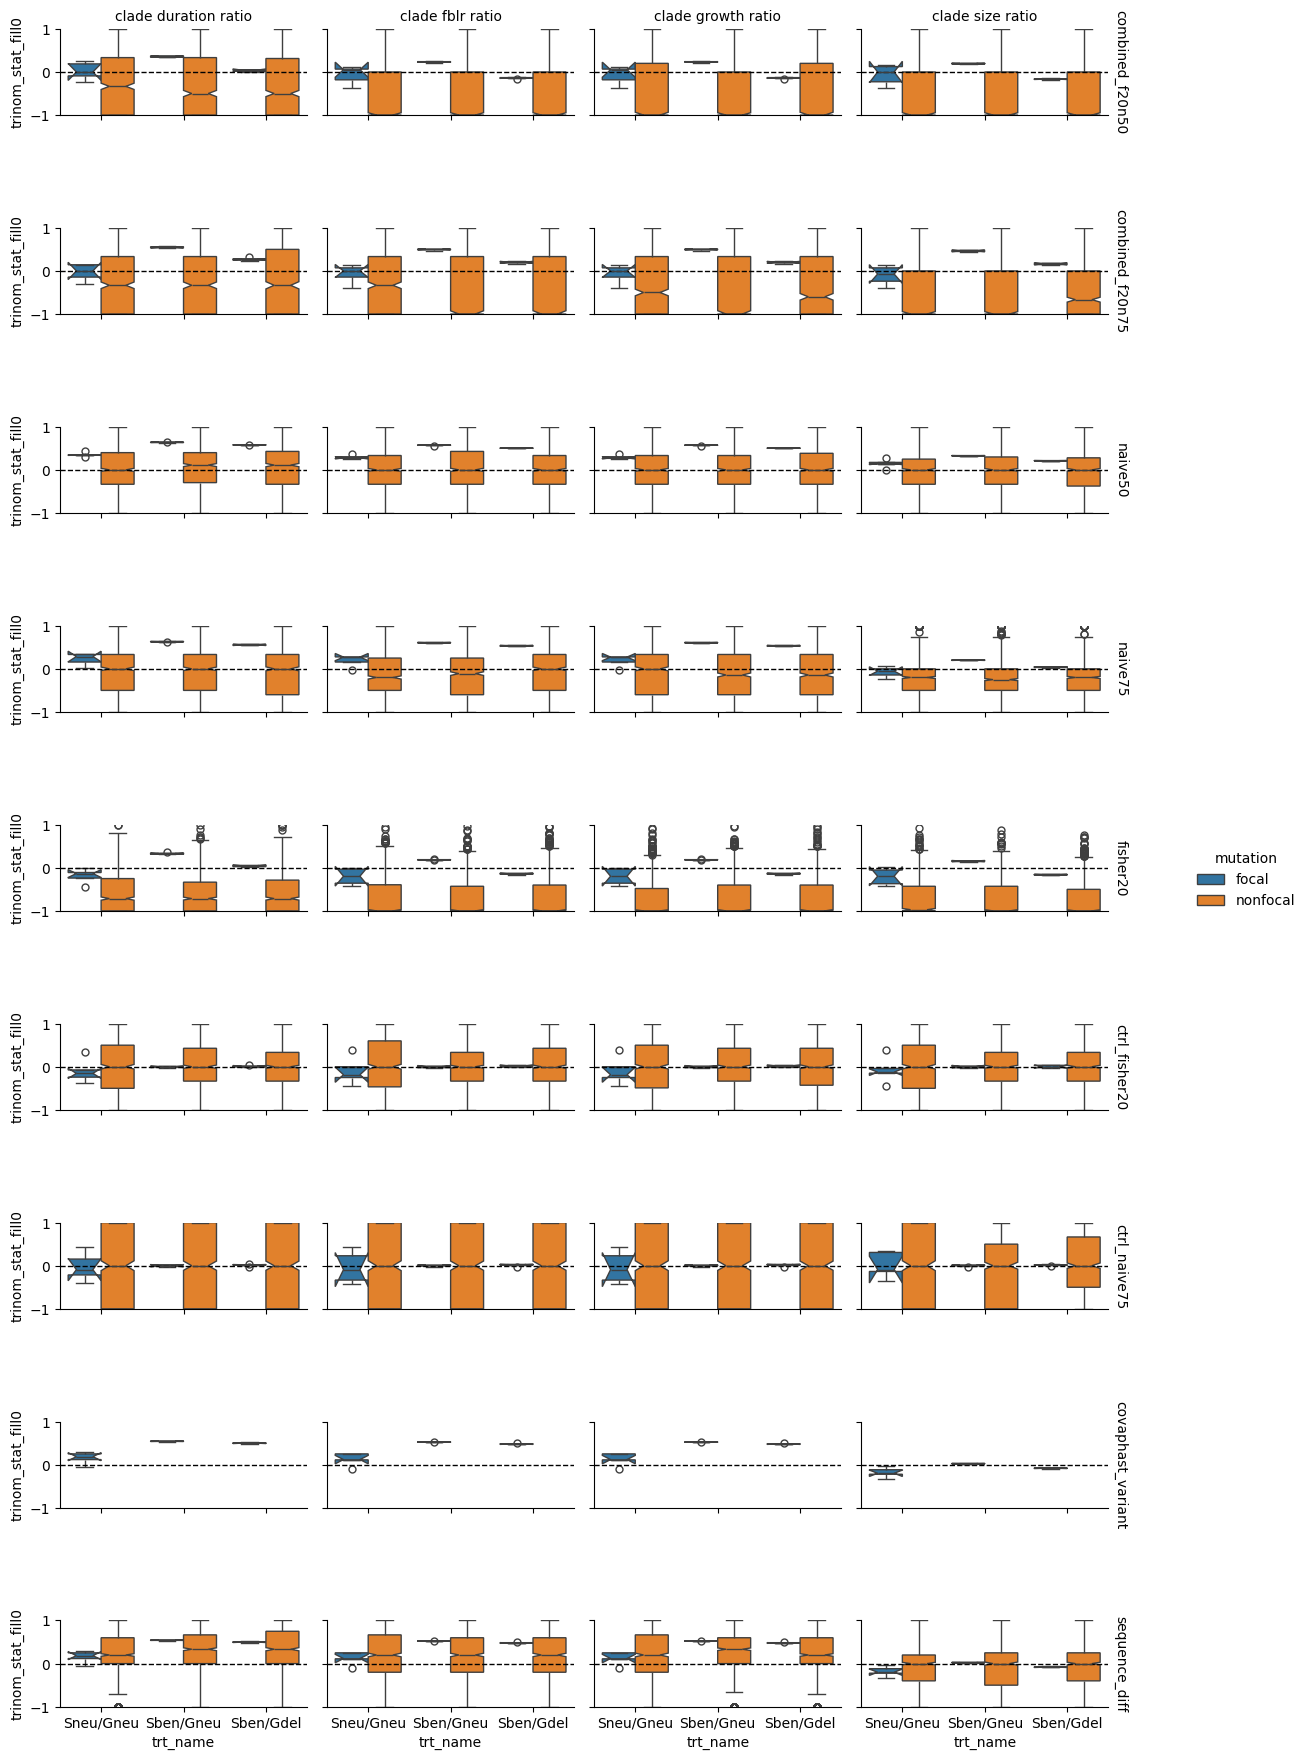

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


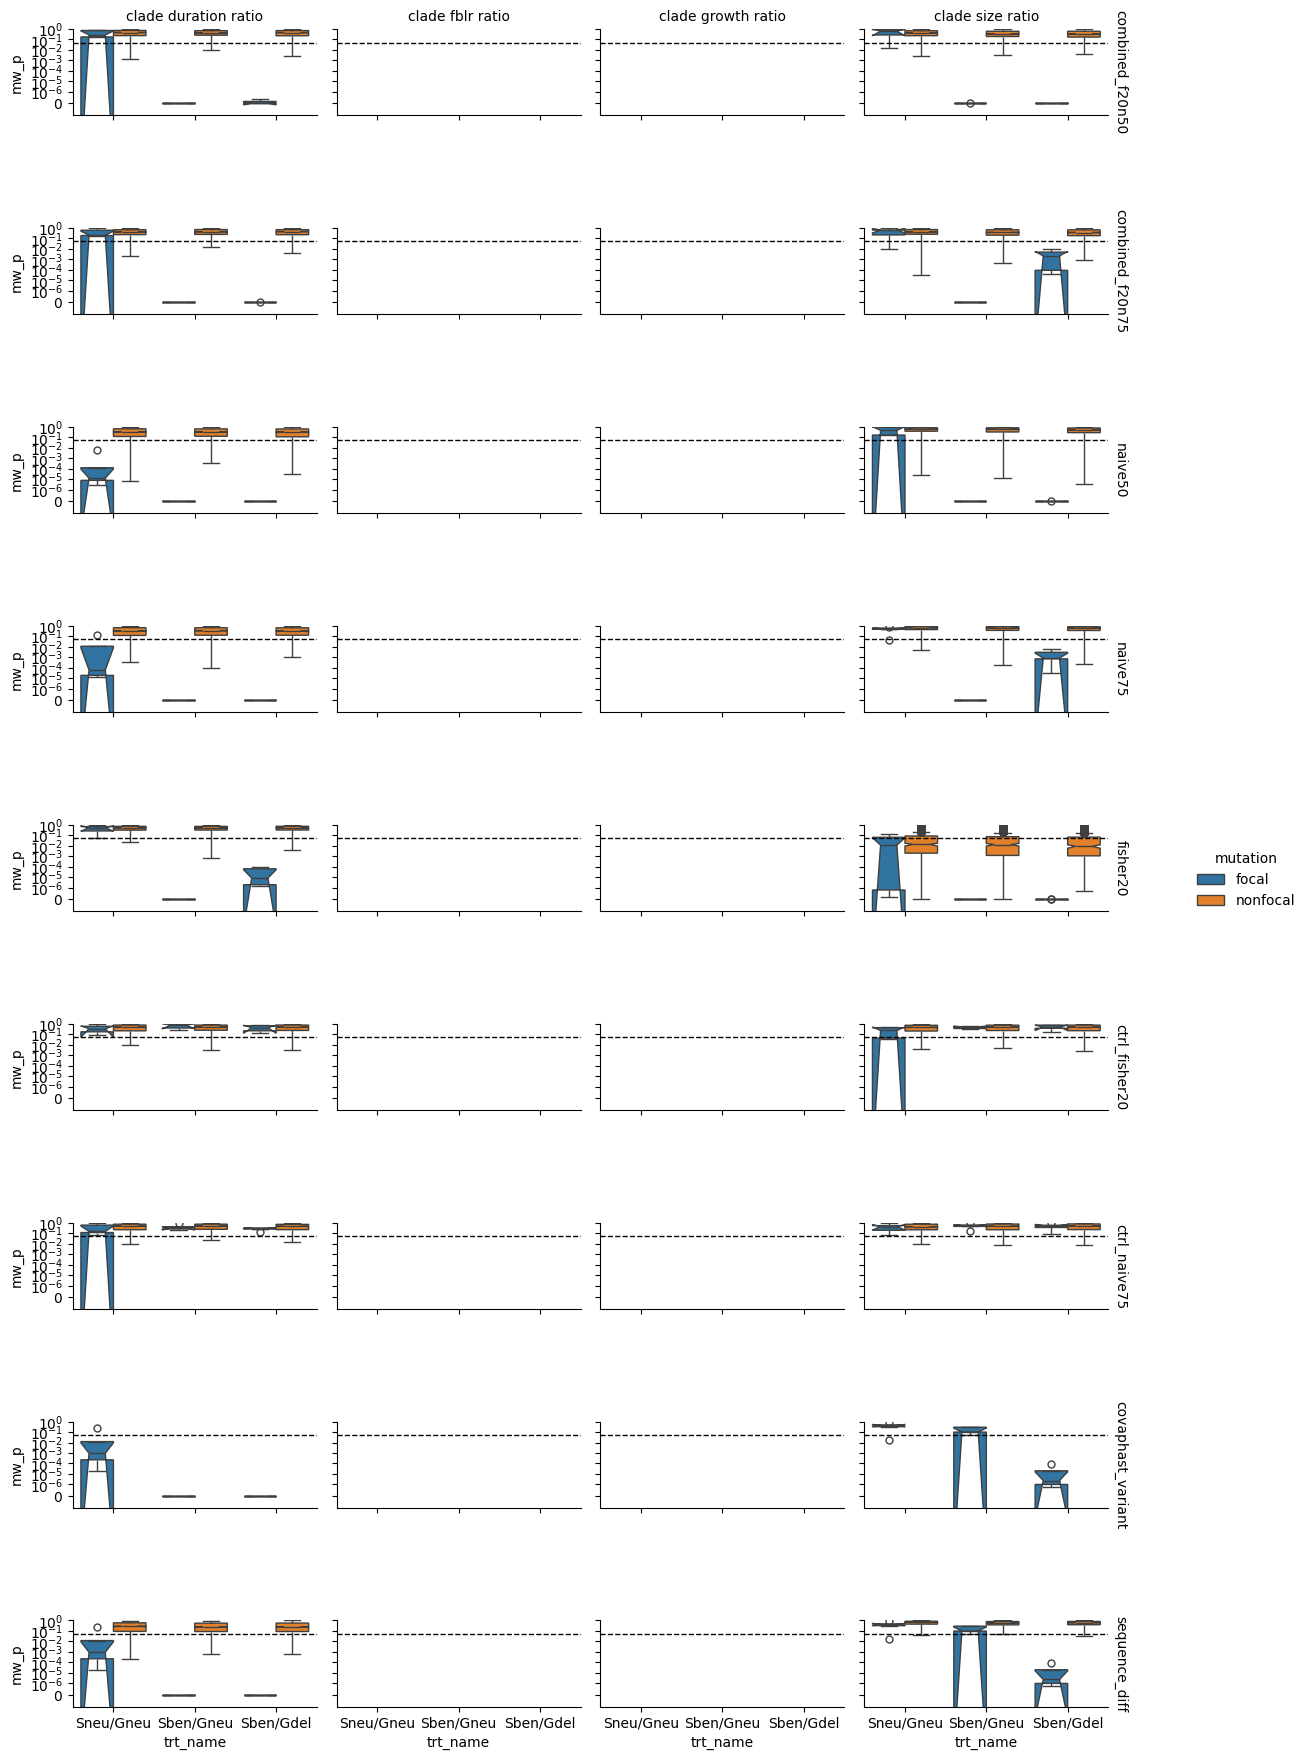

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


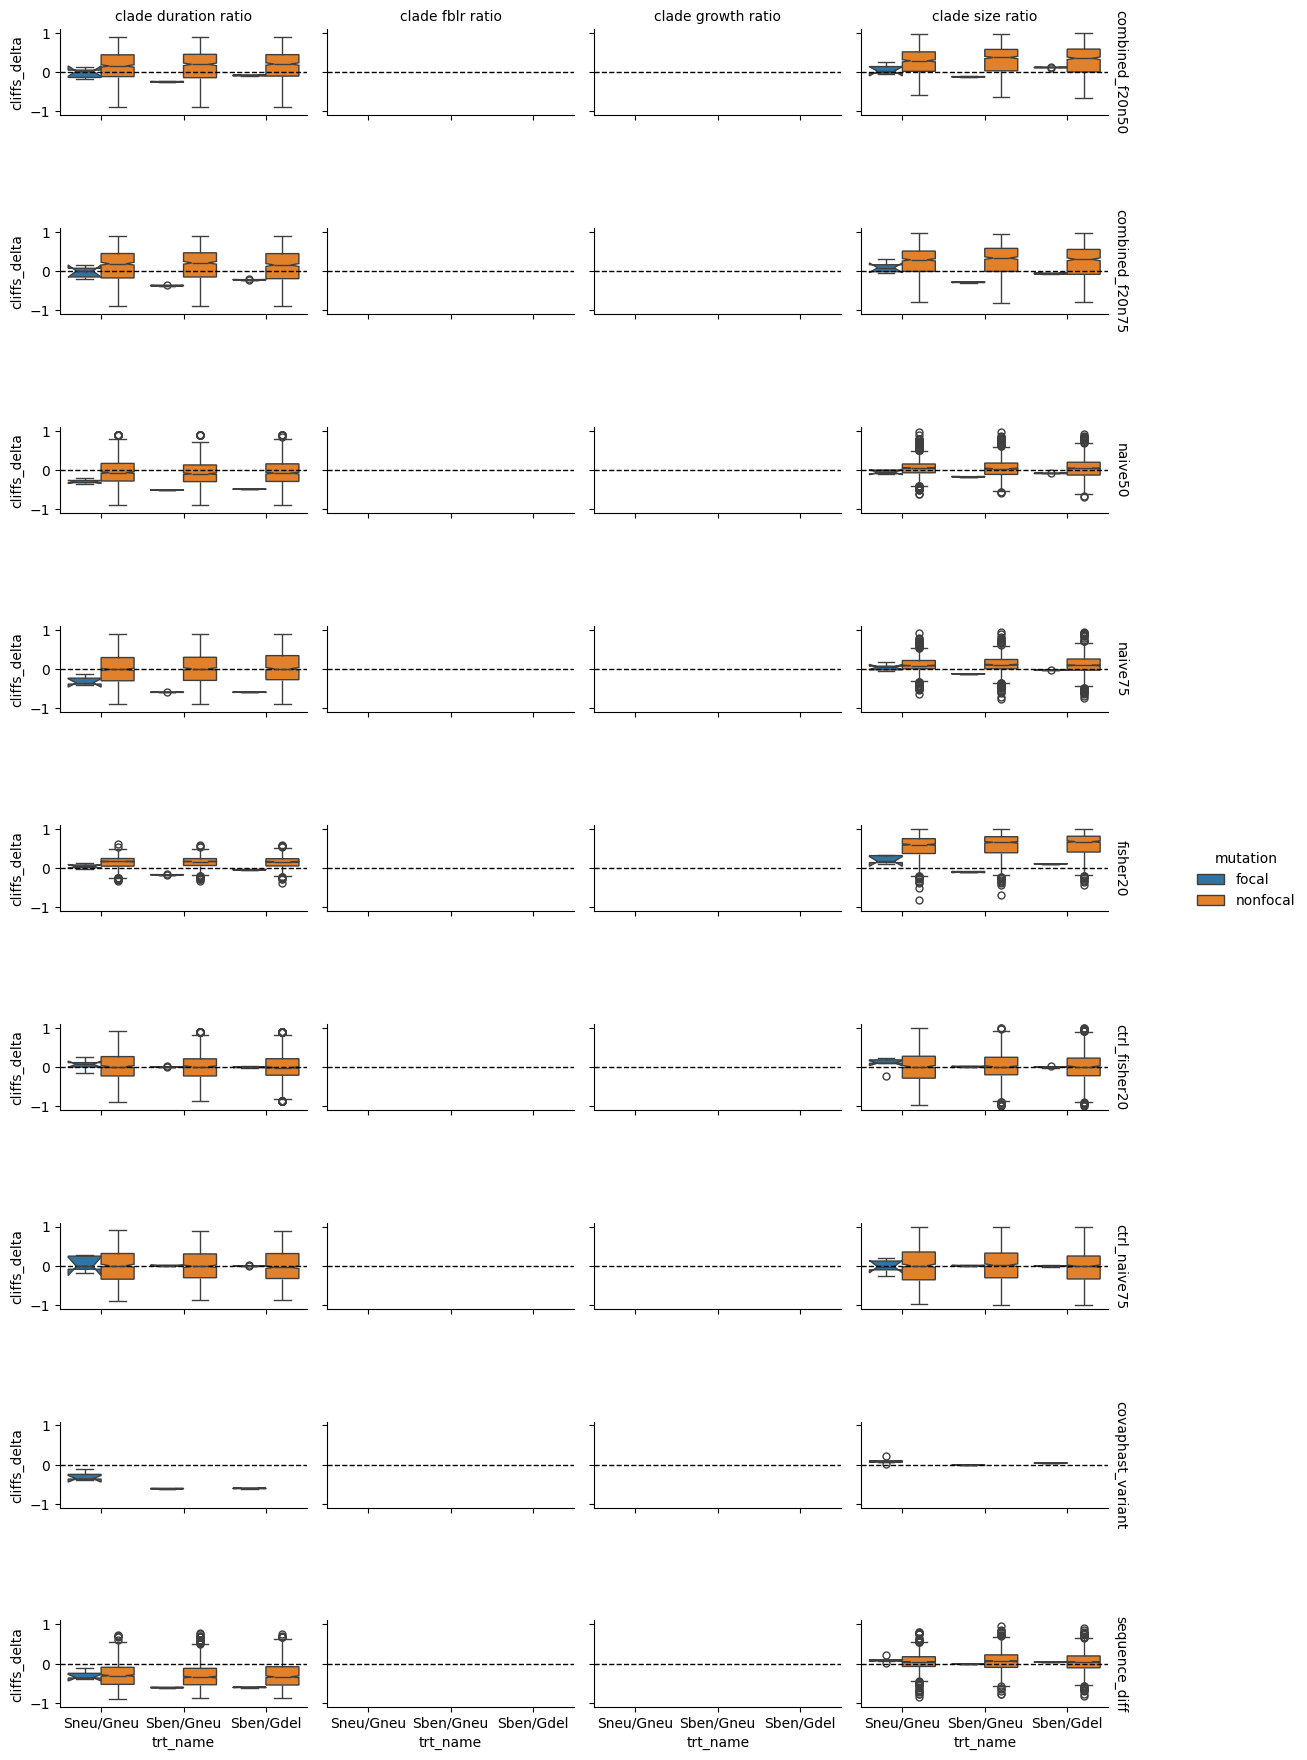

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


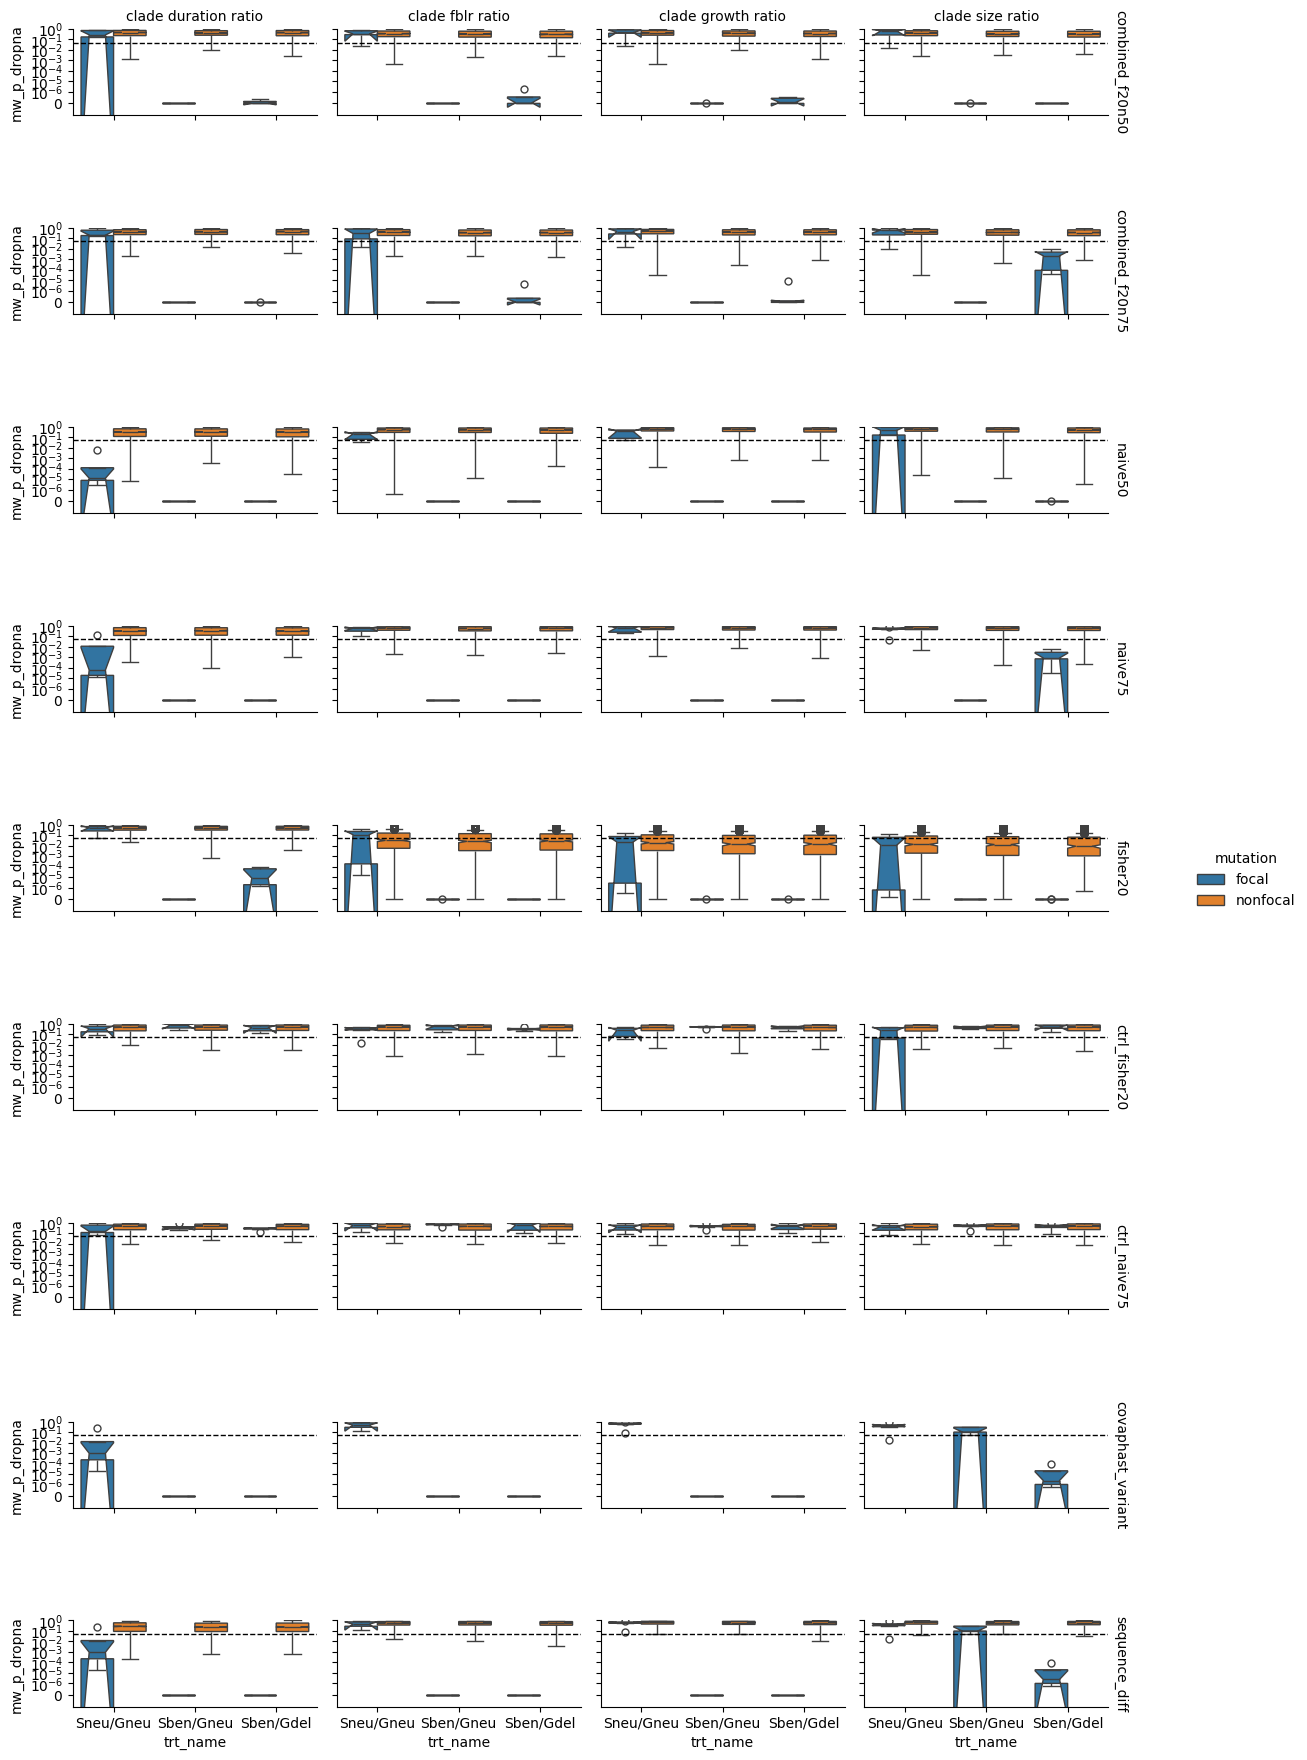

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


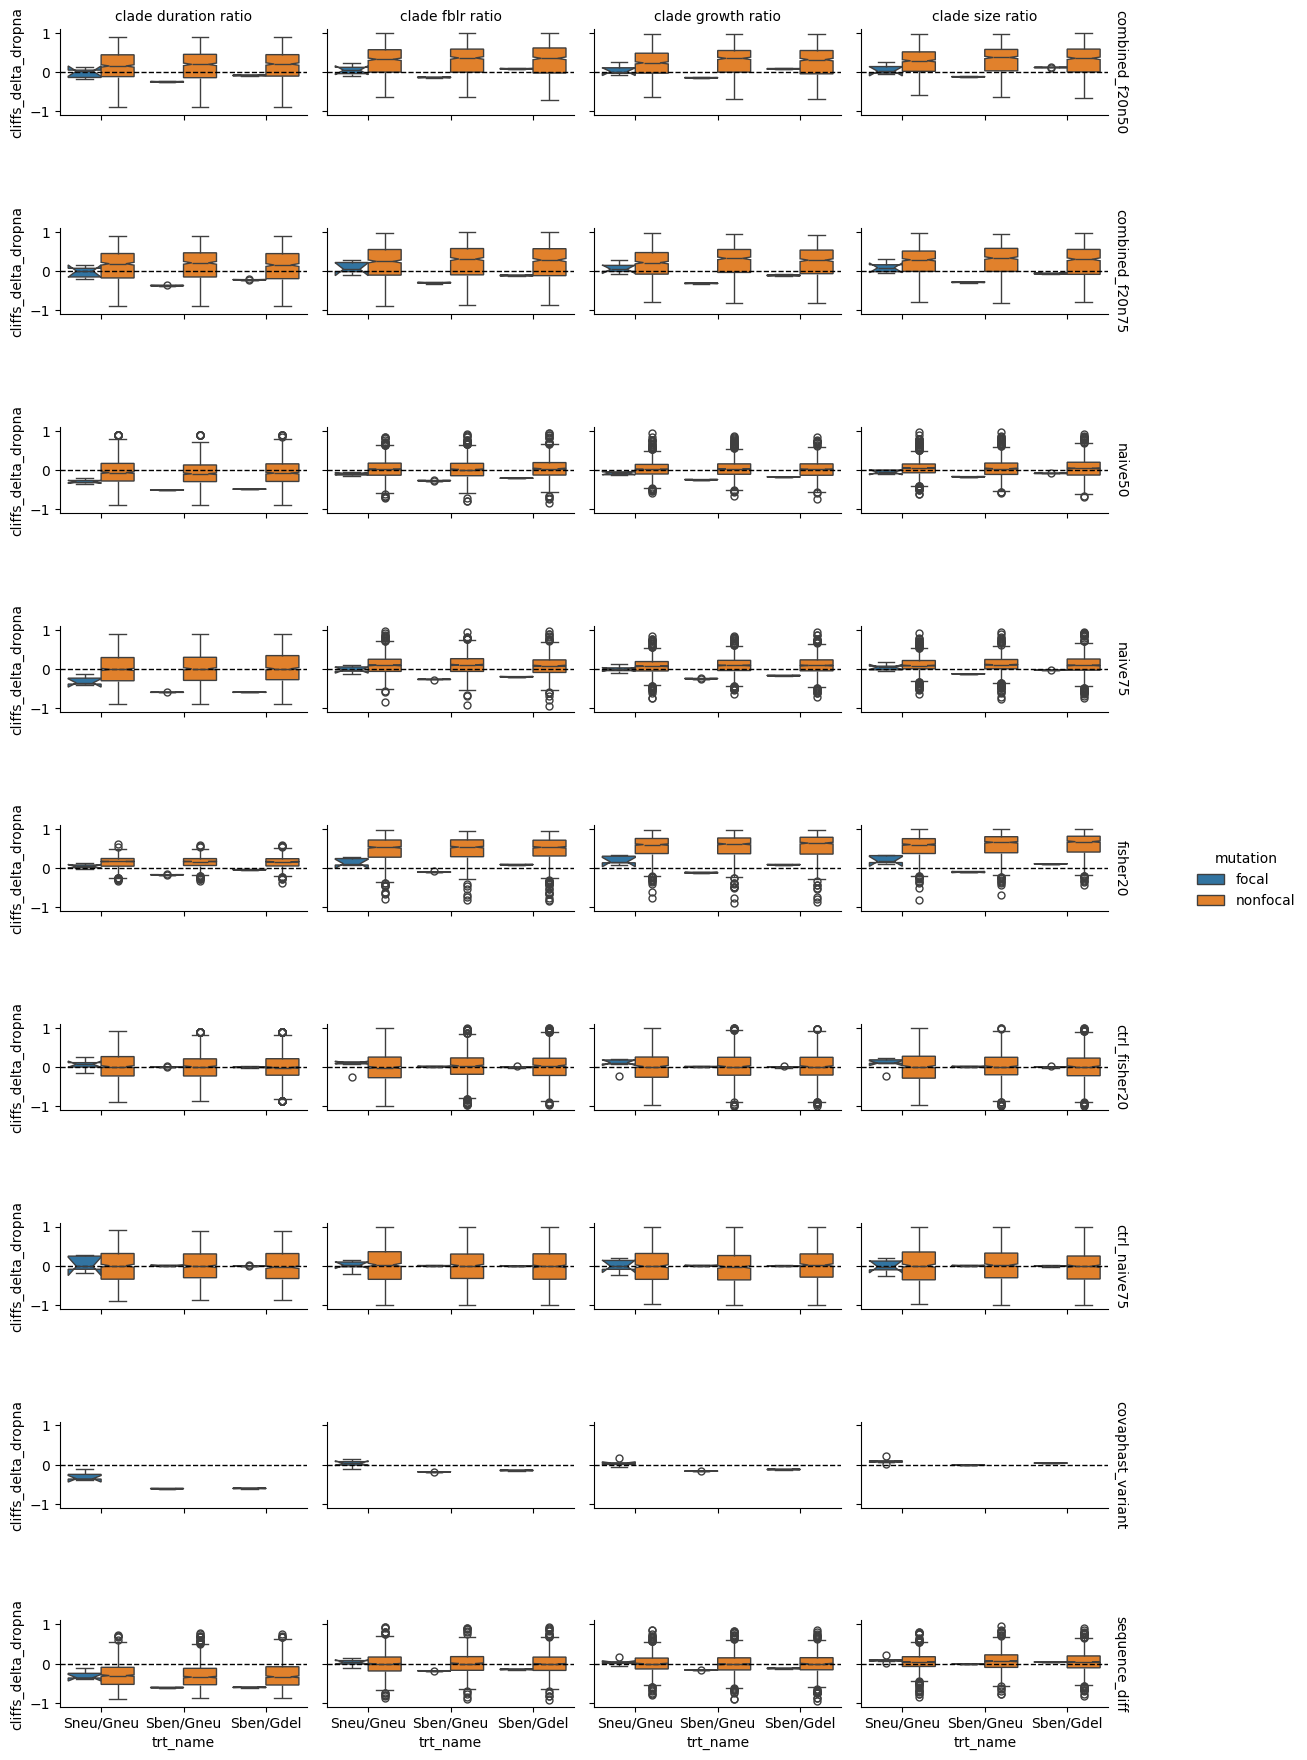

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


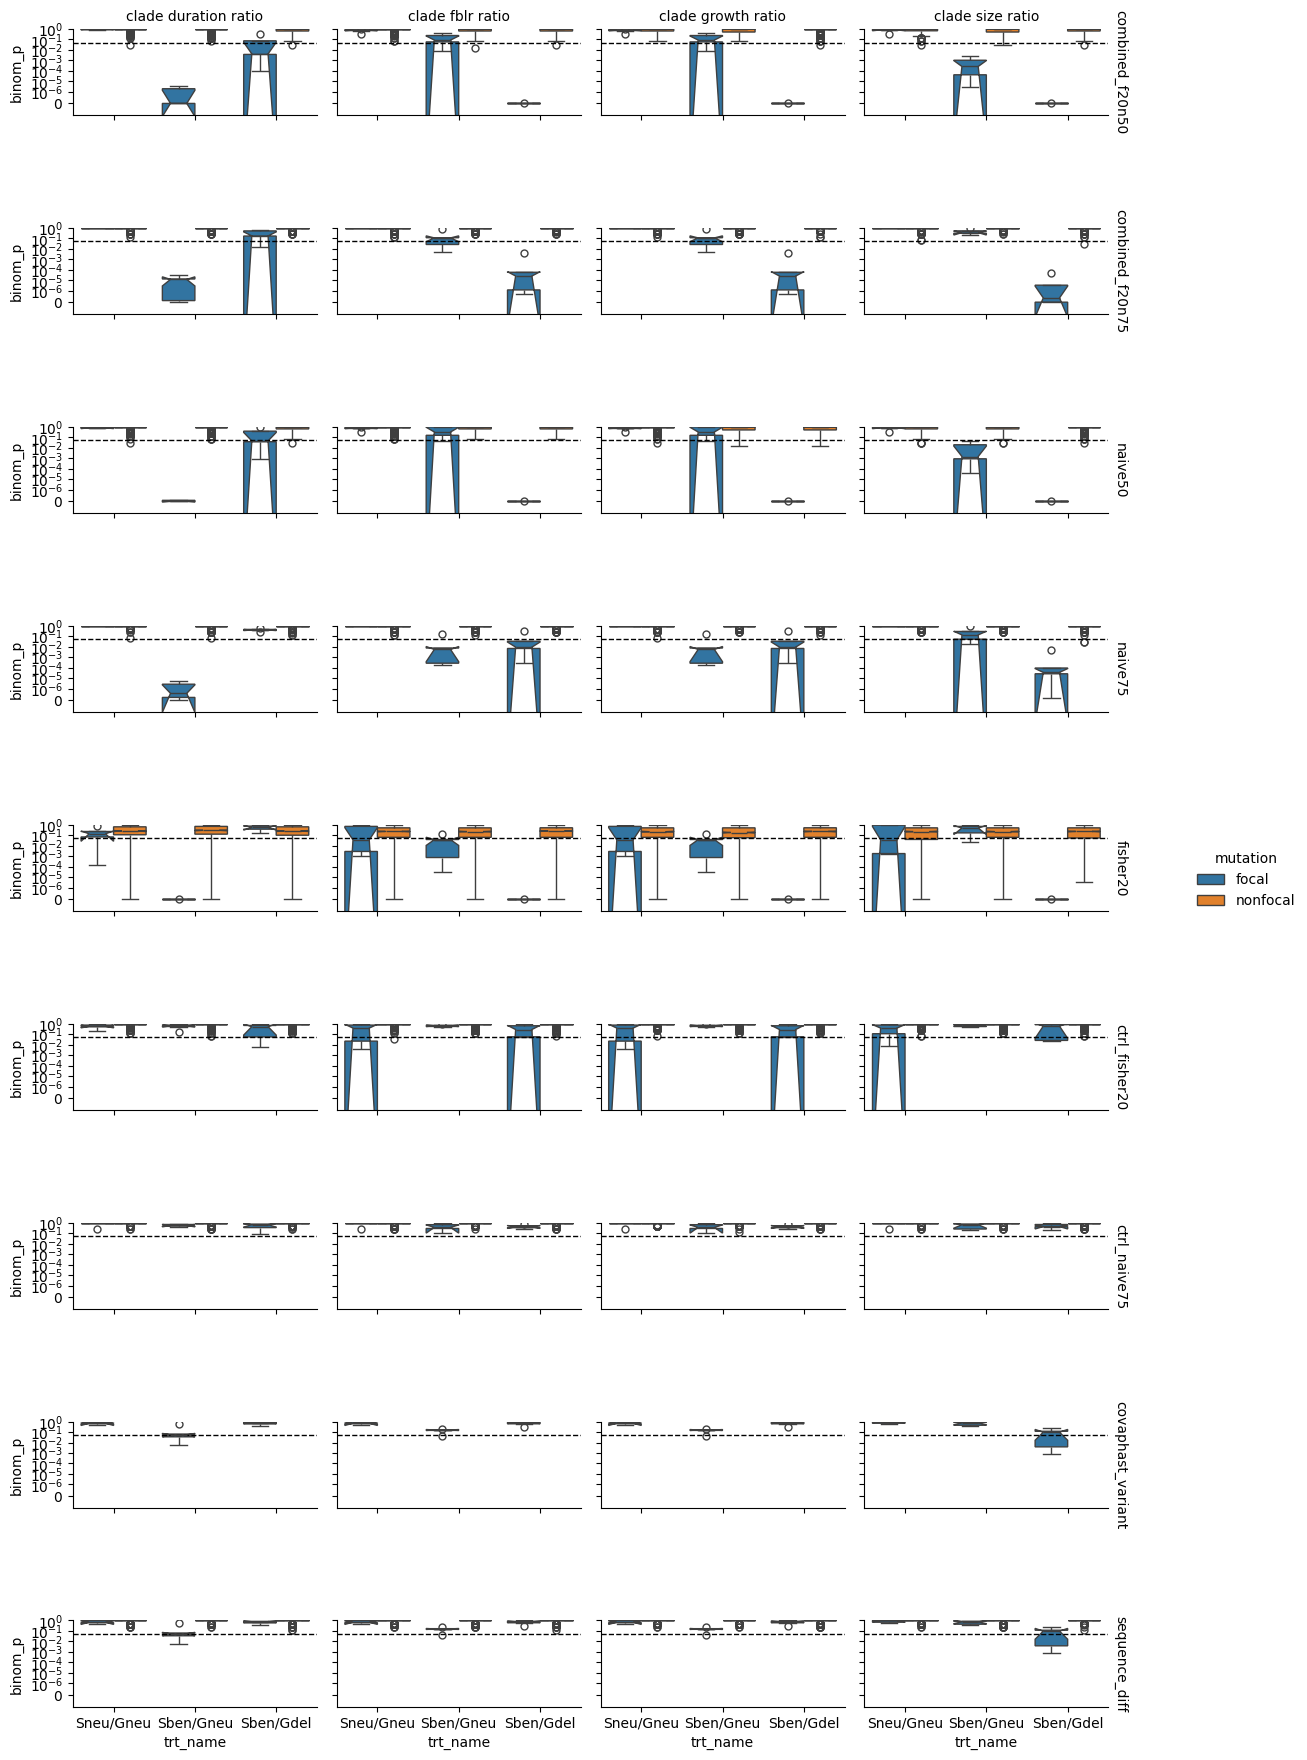

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


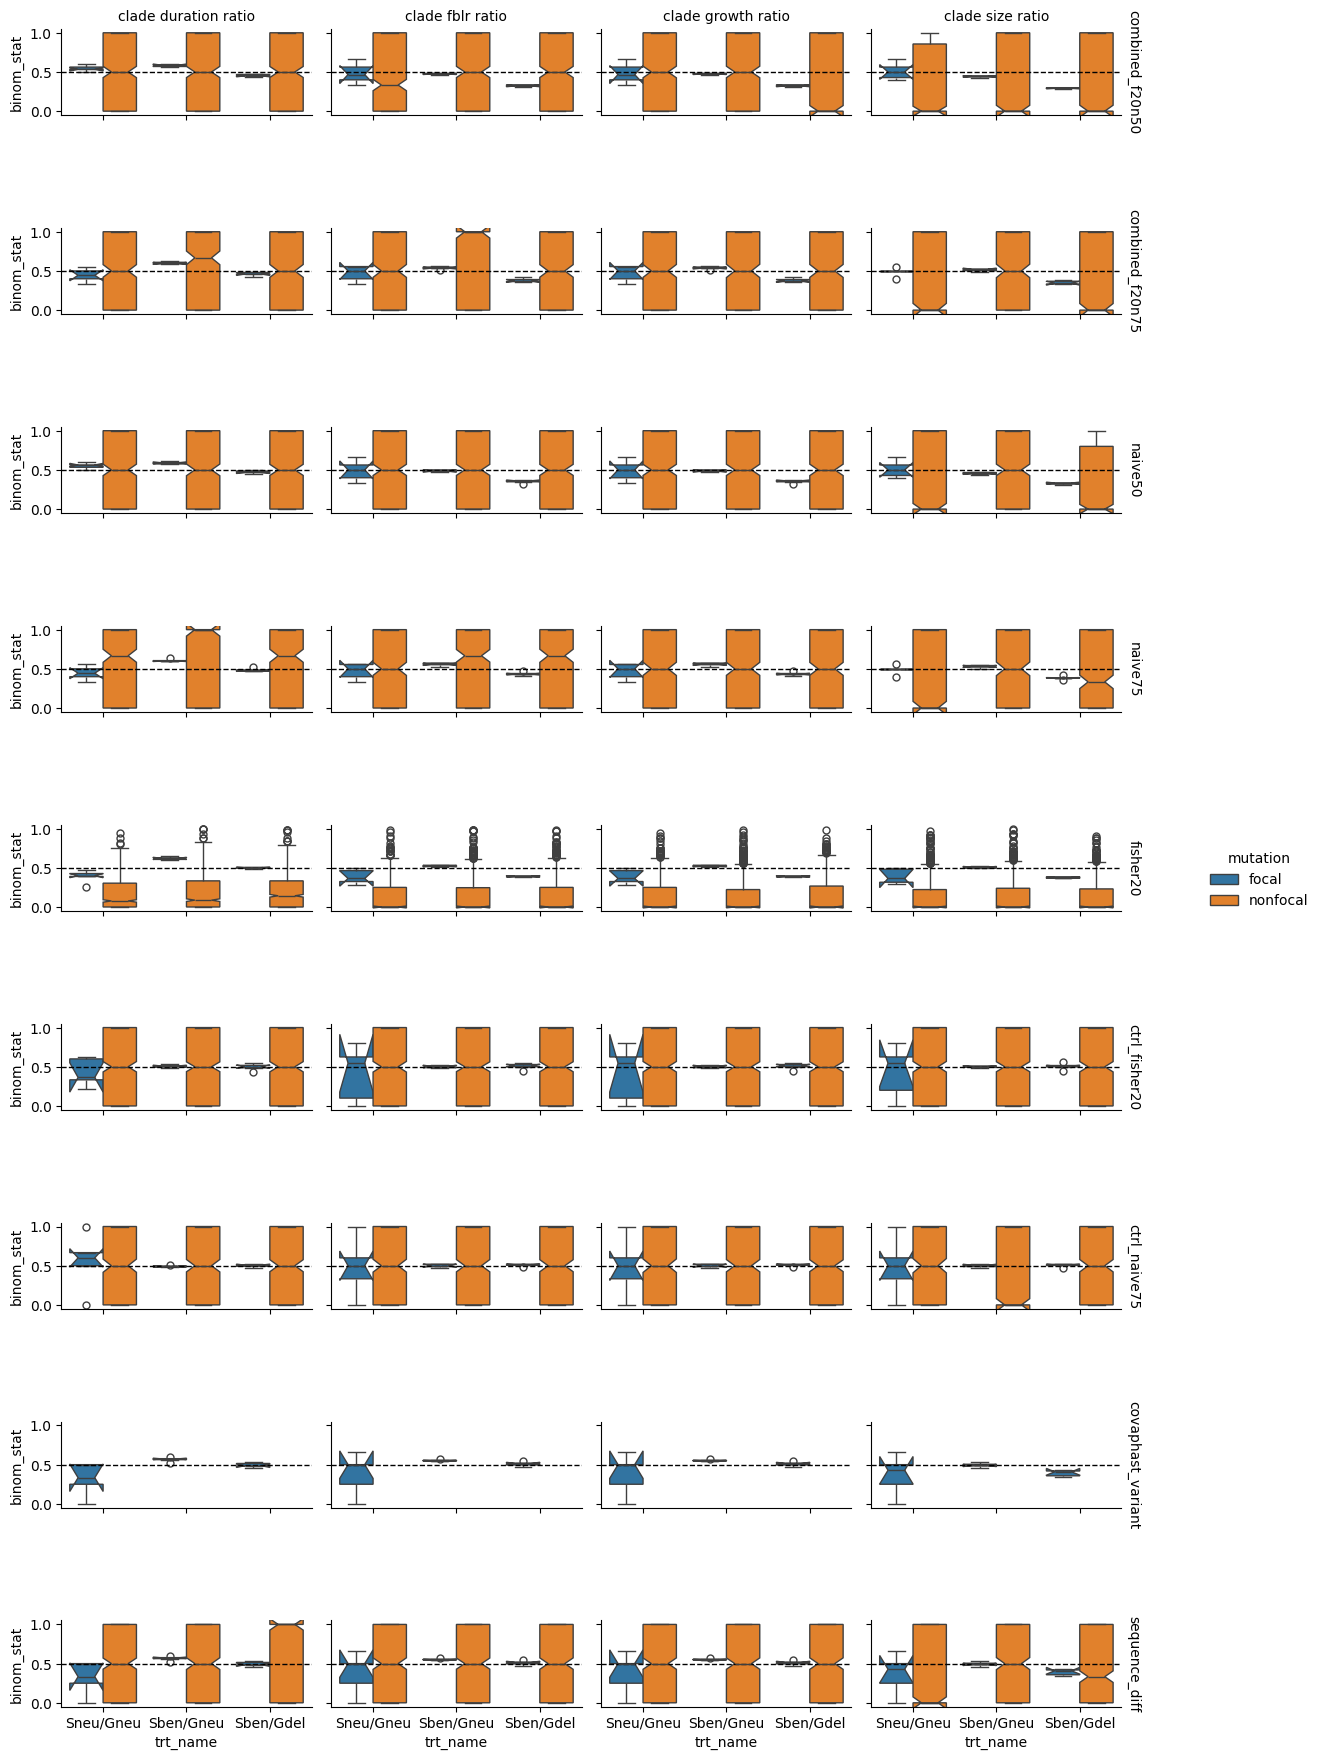

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


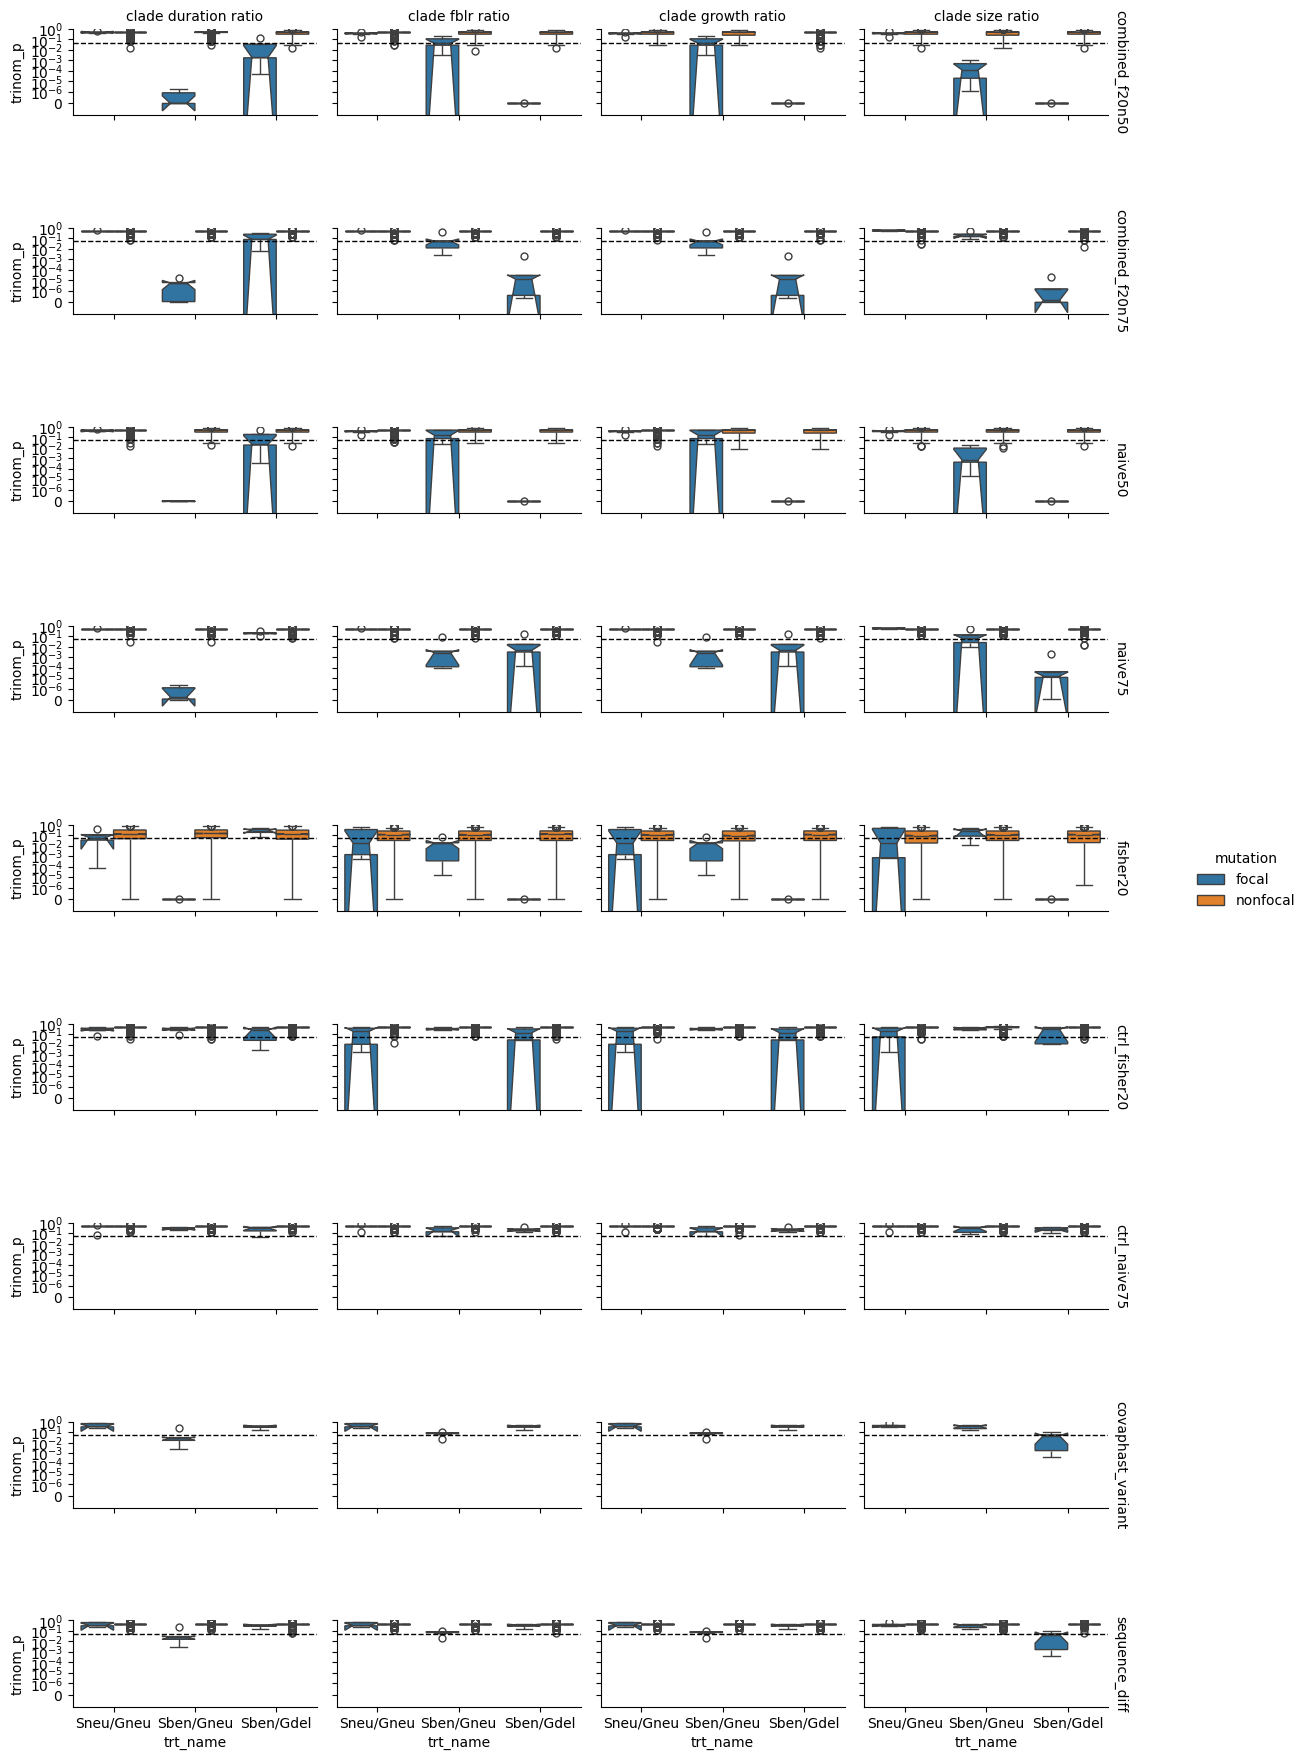

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


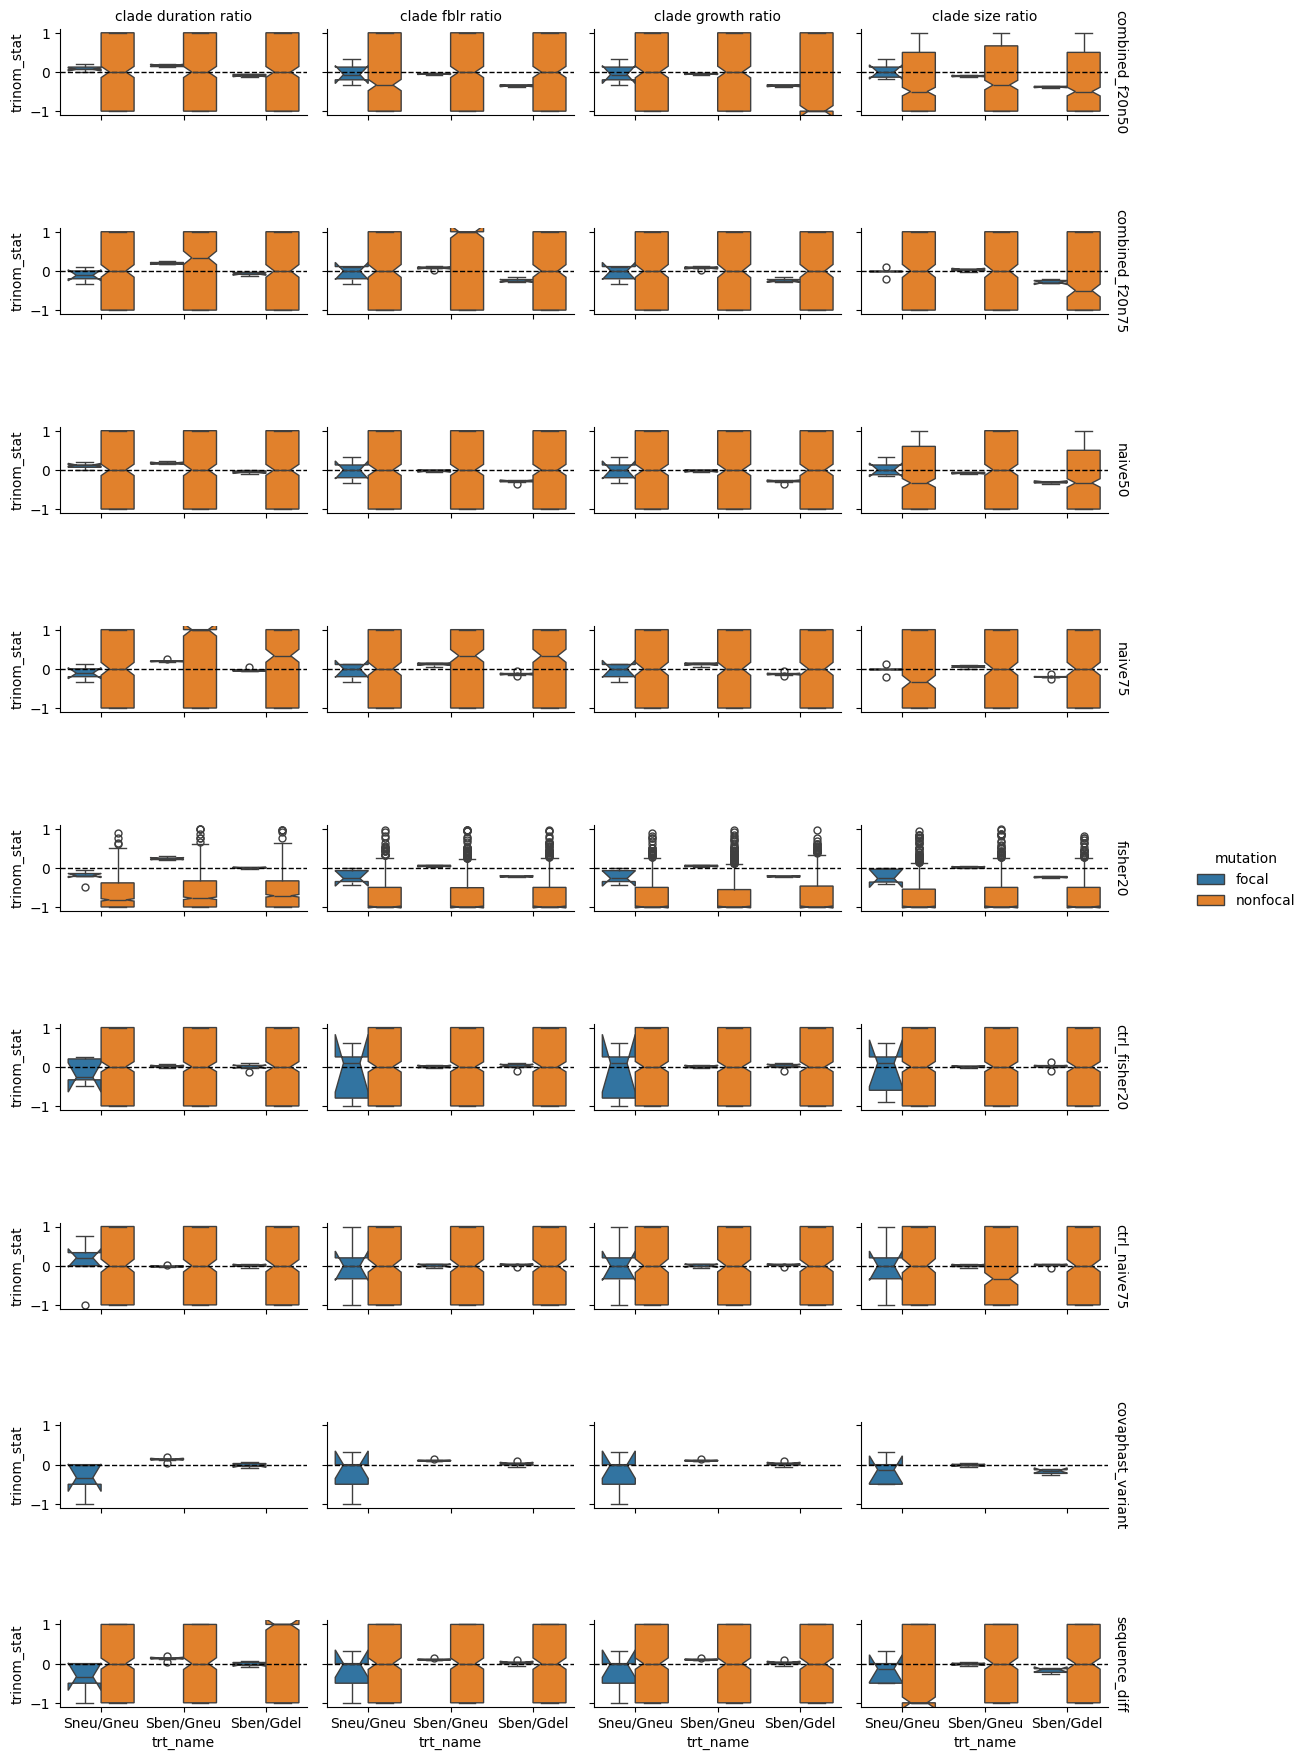

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


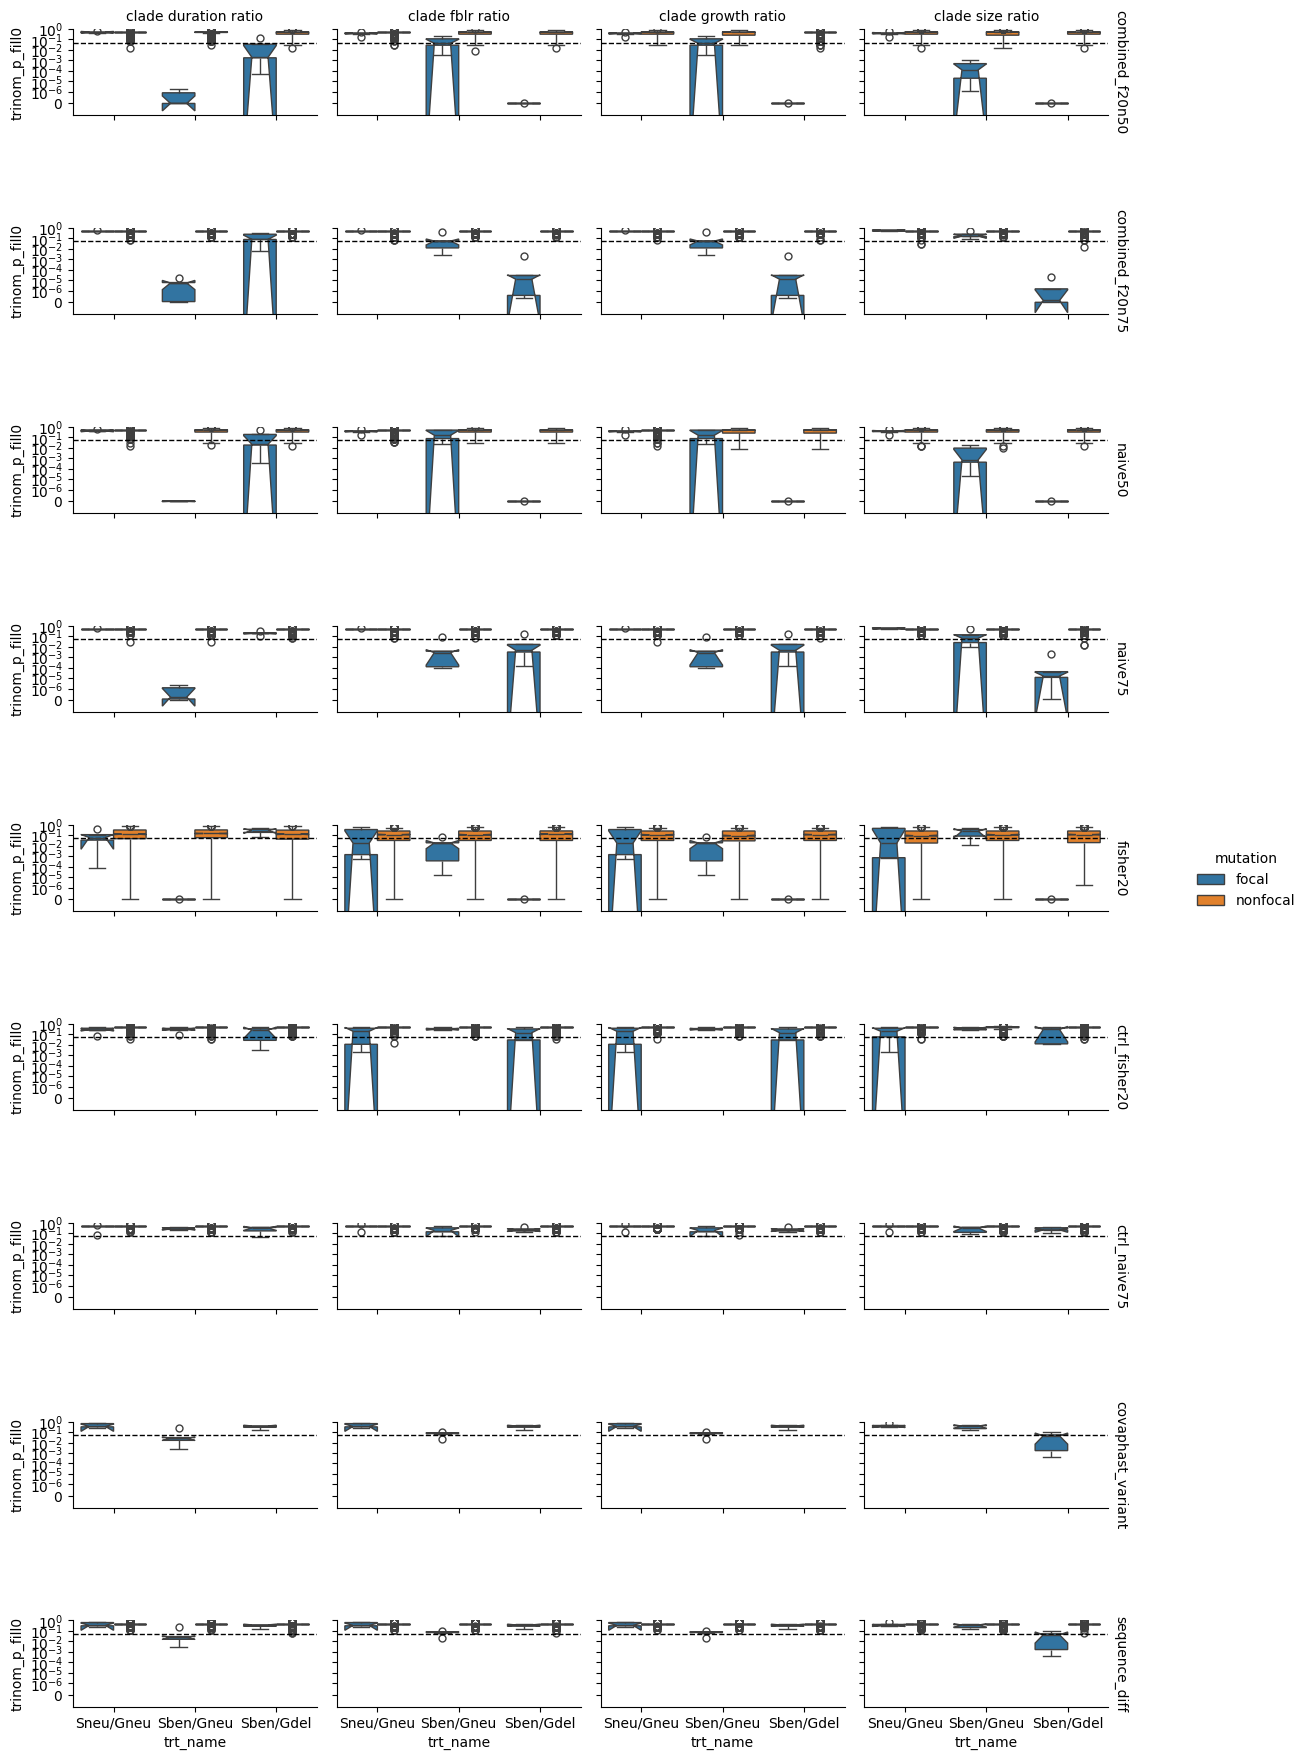

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


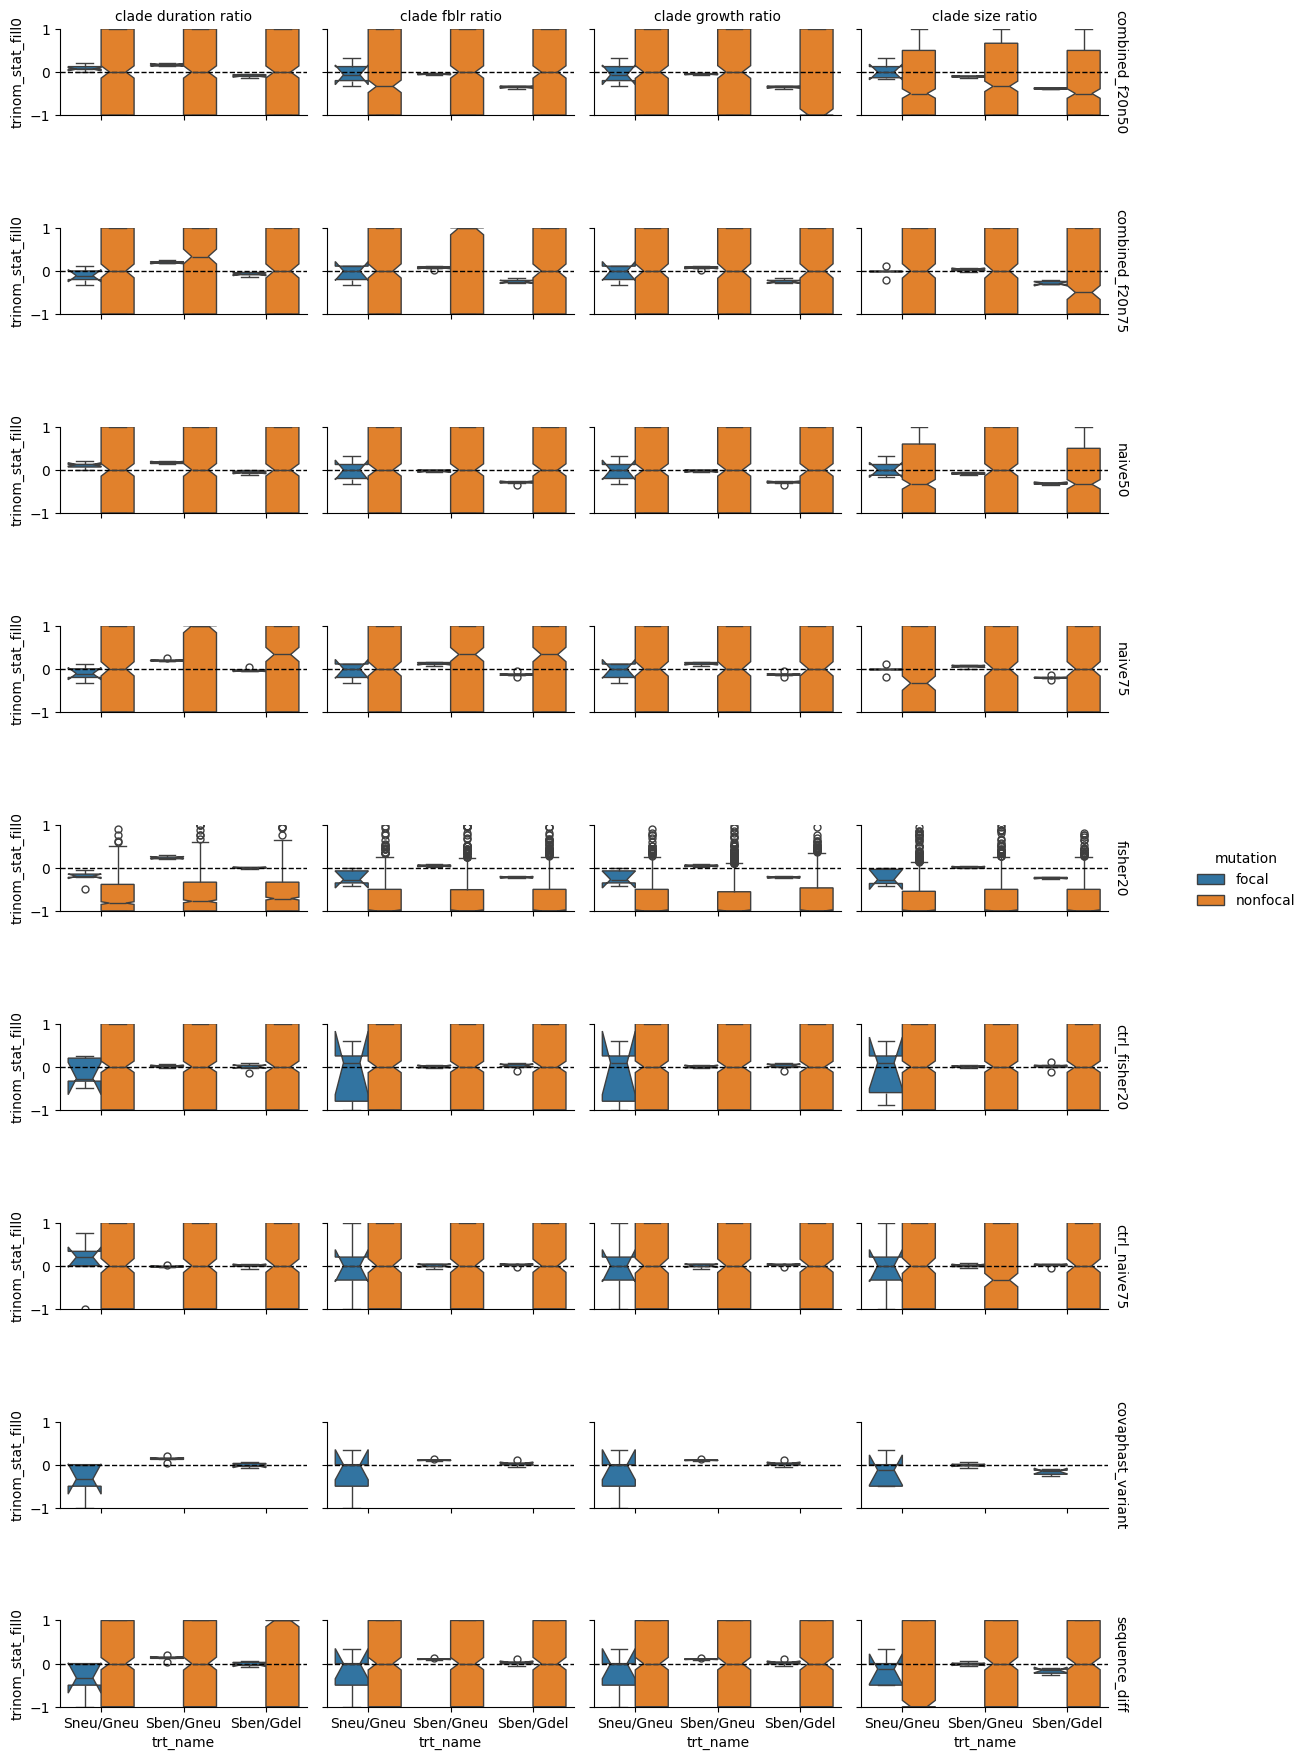

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


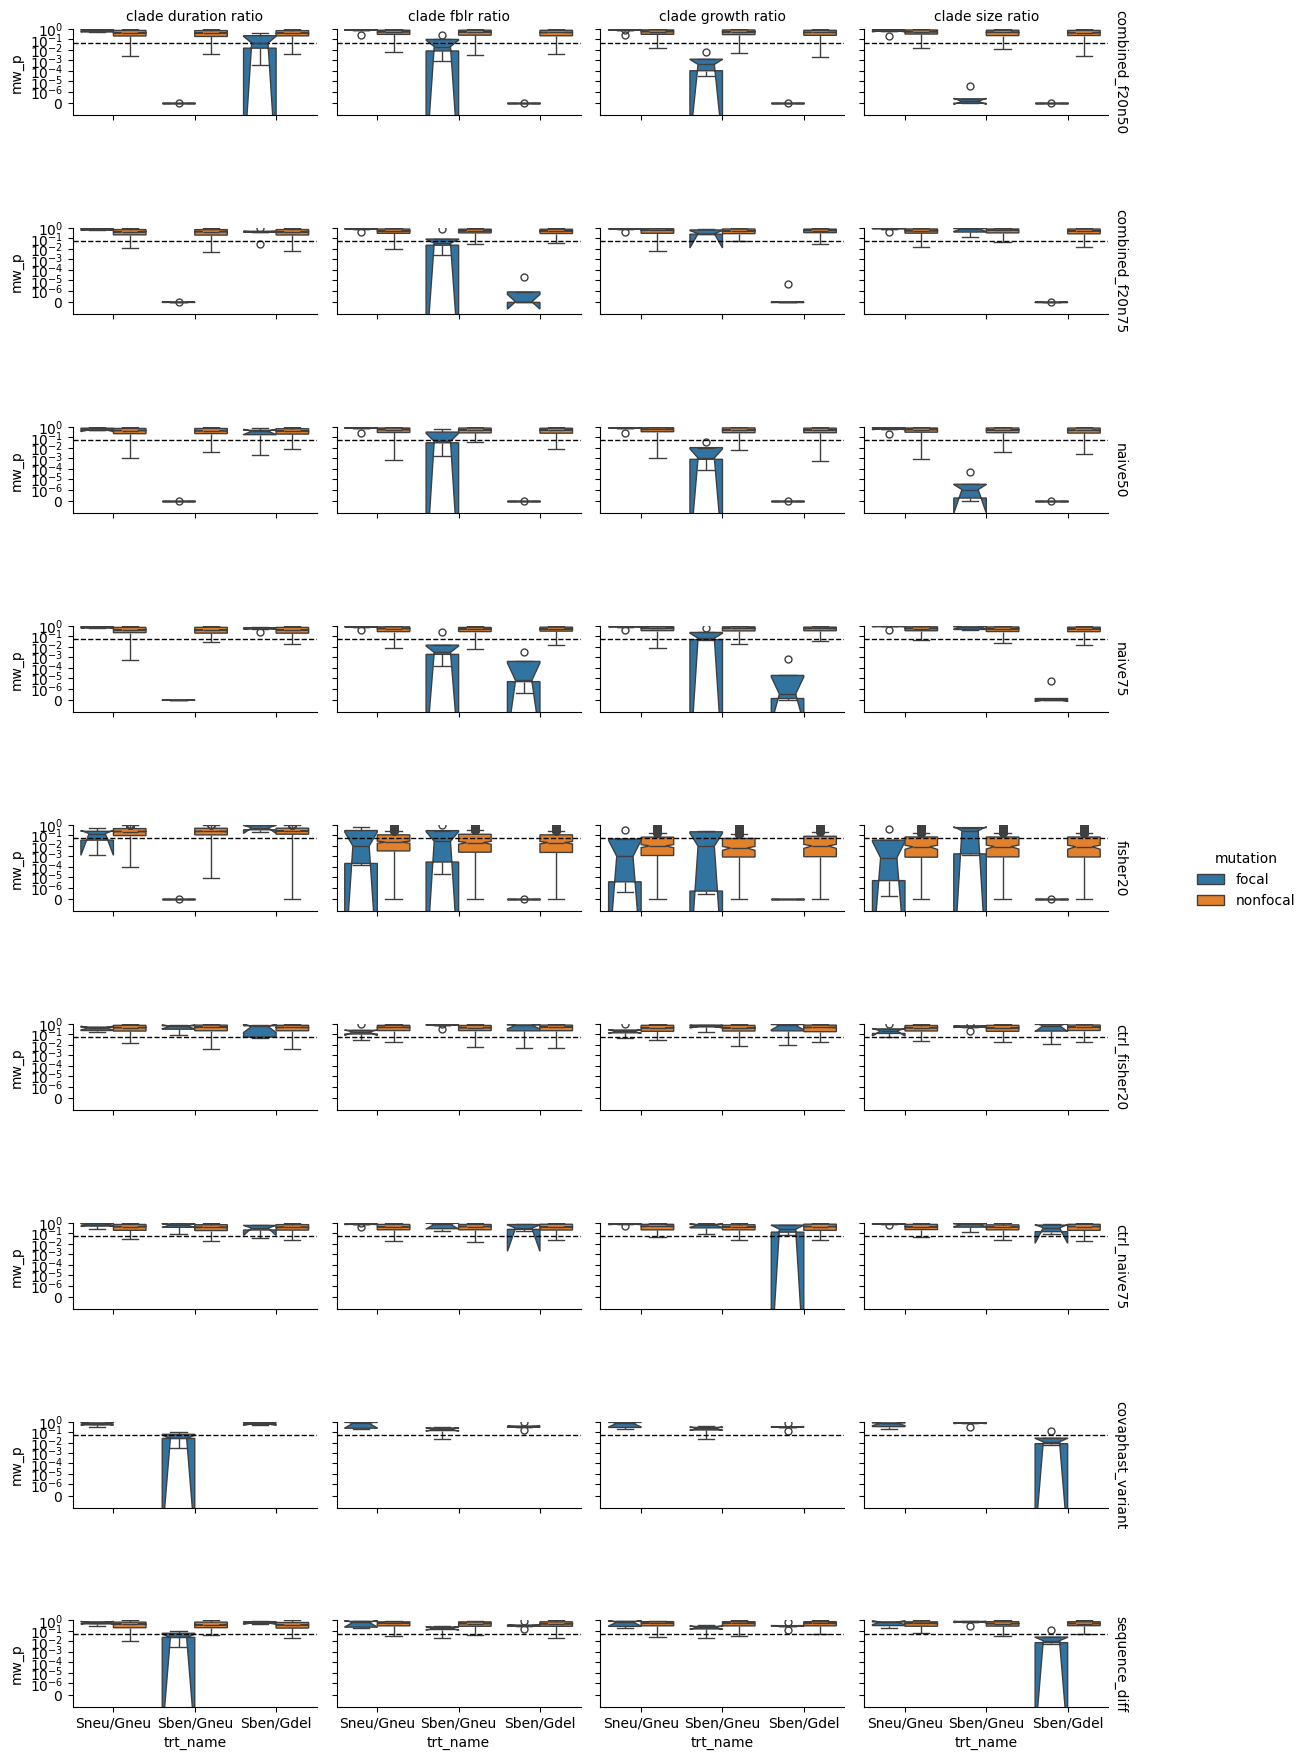

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


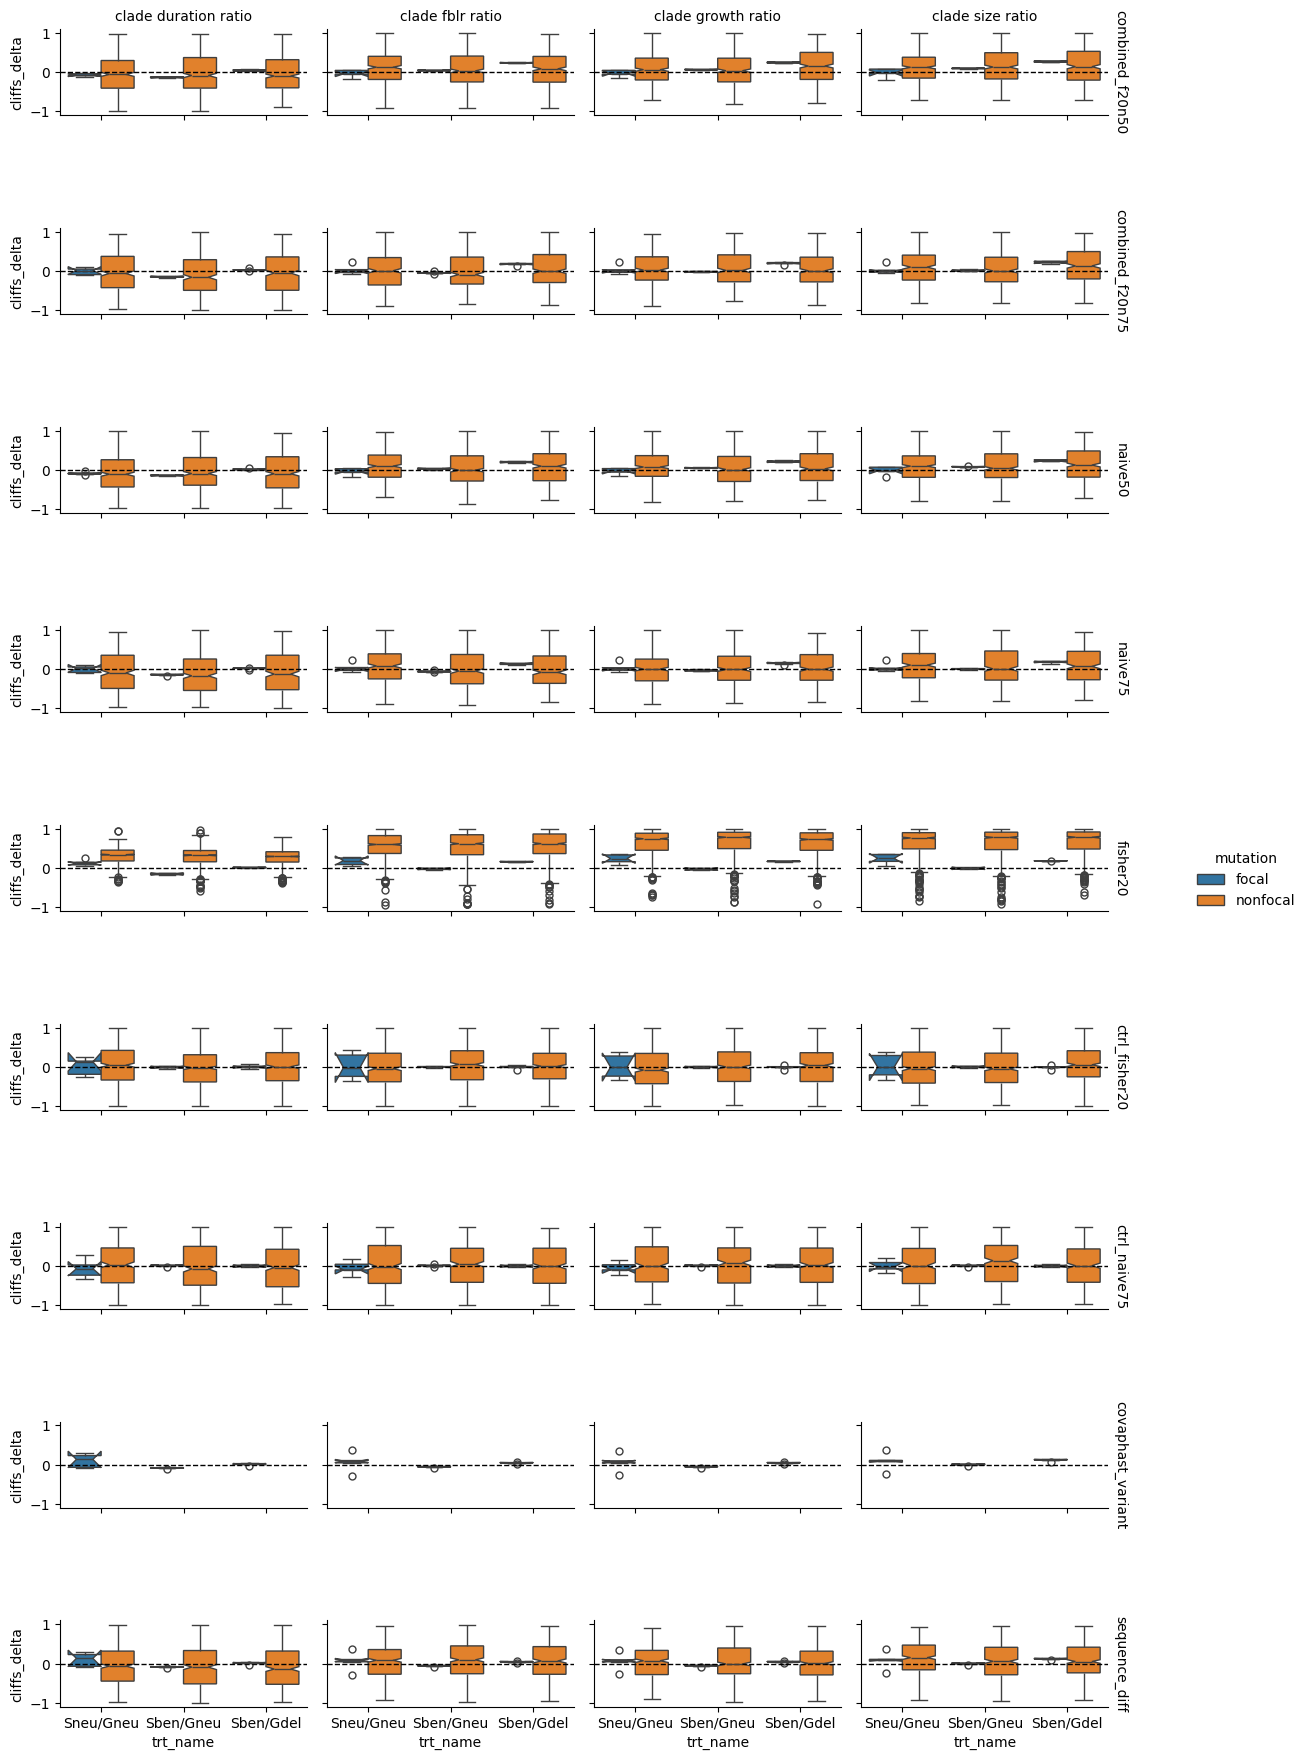

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


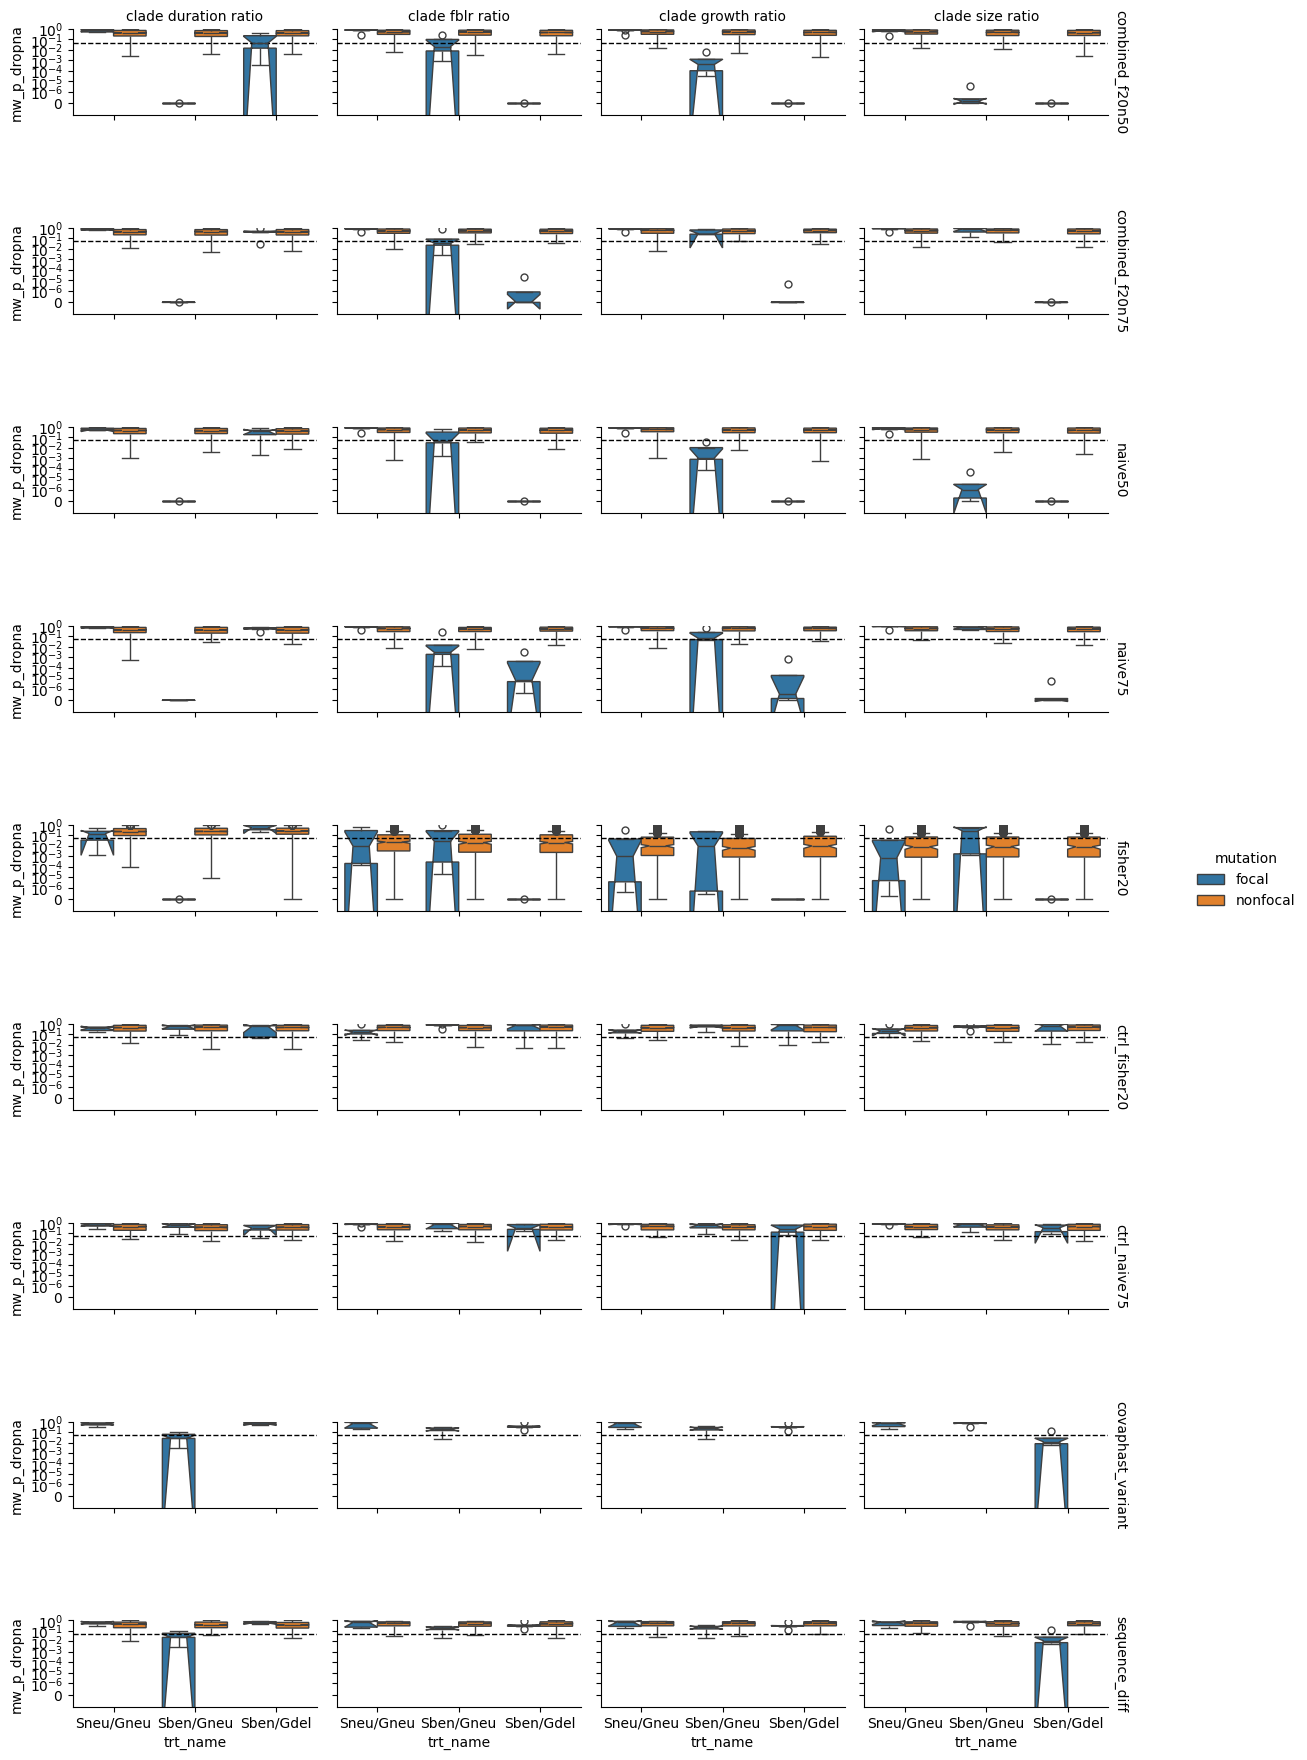

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


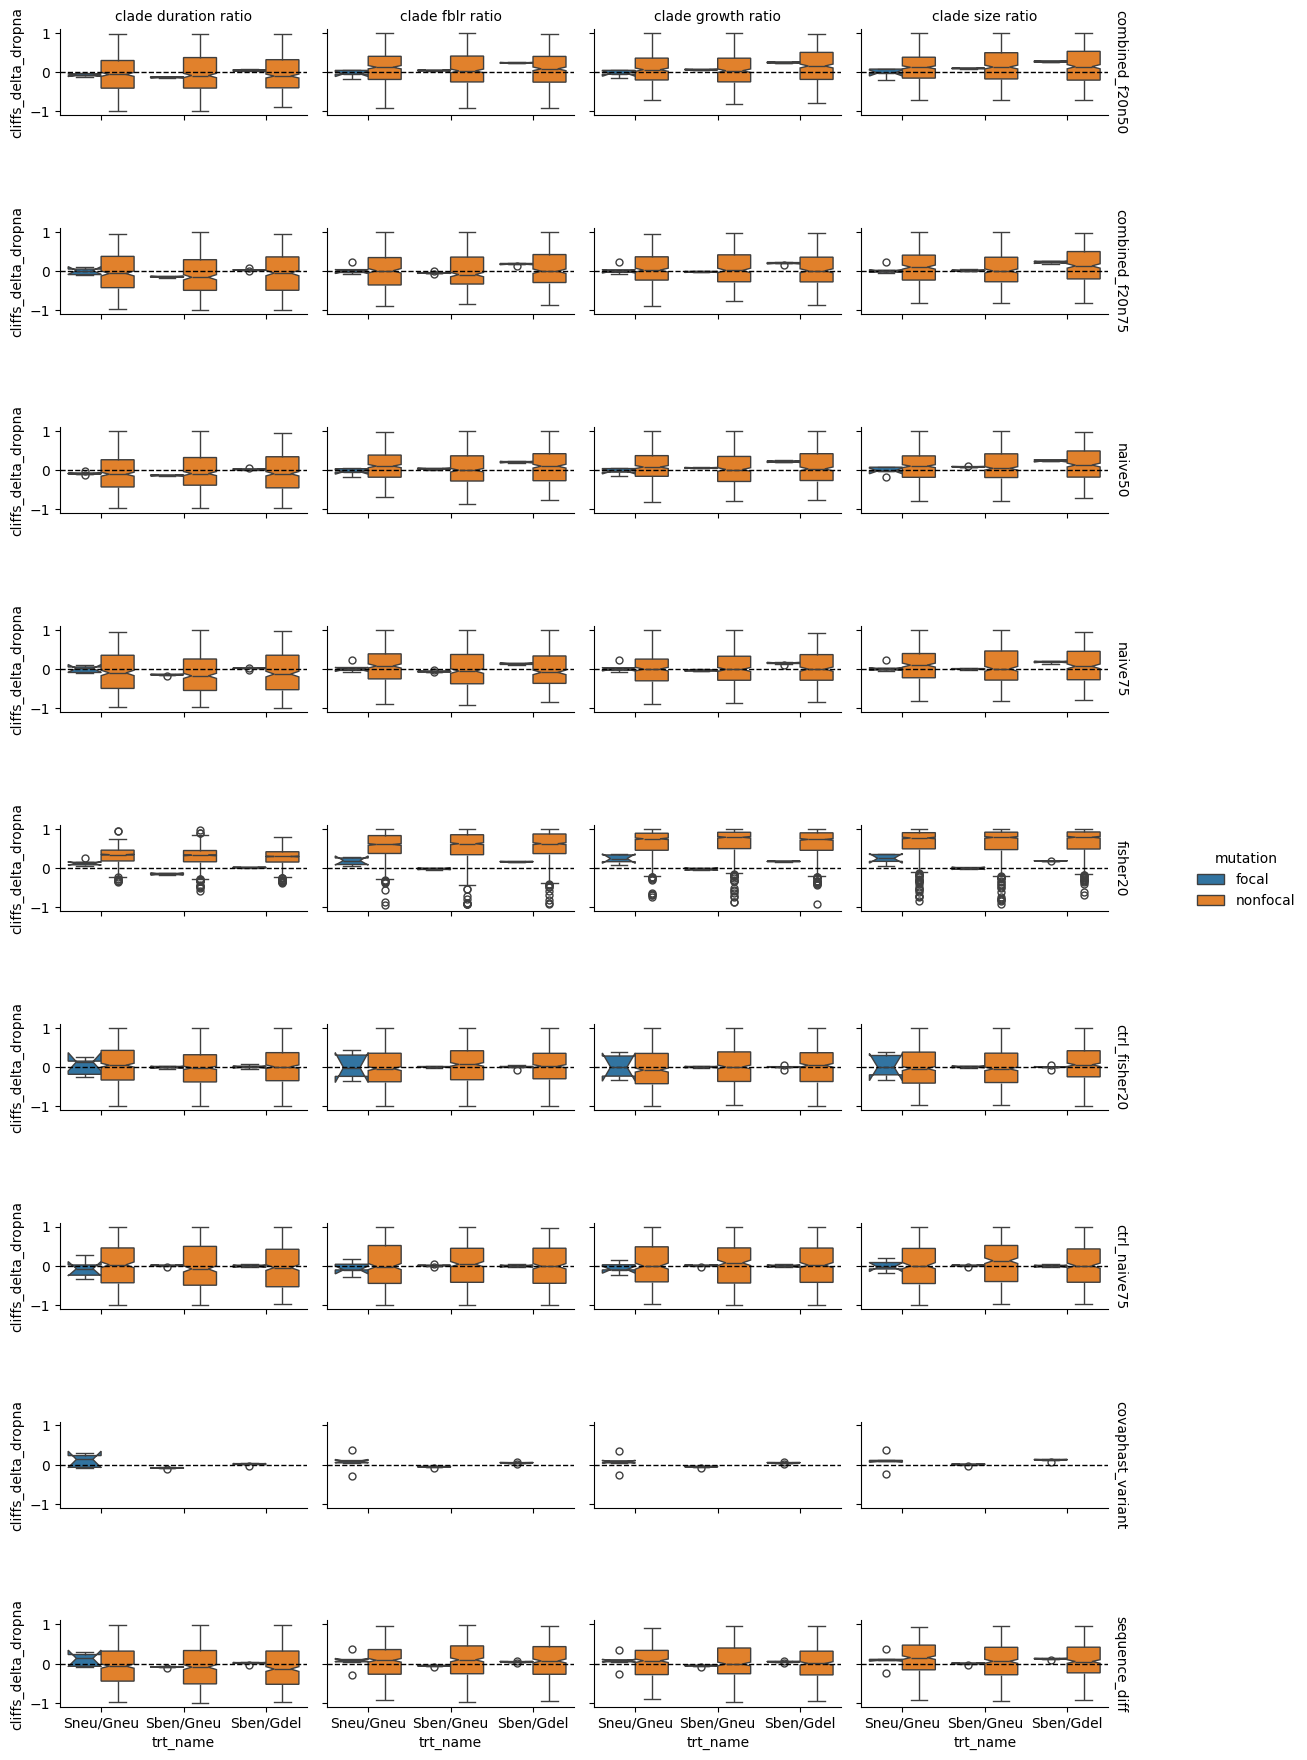

In [13]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            aspect=1.5,
            height=2,
            notch=True,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [14]:
stats = (
    "screened_nanmax",
    "screened_nanmean",
    "screened_nanmedian",
    "mut_nobs",
    "binom_n",
    "beq_nanmax",
    "beq_nanmean",
    "screened_frac0",
    "screened_frac1",
    "screened_frac2",
    "screened_frac3",
)


In [15]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"] == "num_leaves")
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=100, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 270/270 [00:02<00:00, 114.22it/s]


In [16]:
data = pd.DataFrame(records)


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.png


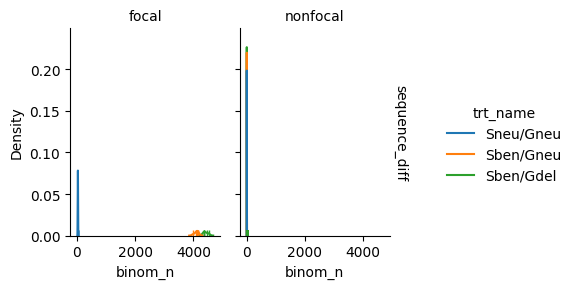

In [17]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="binom_n",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        # log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.png


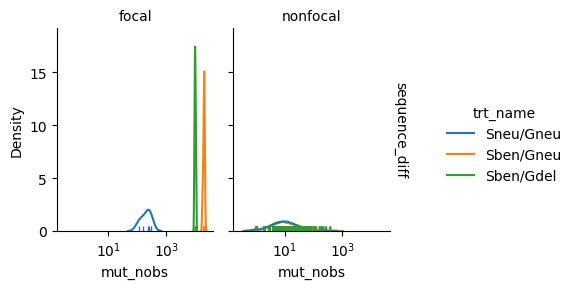

In [18]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="mut_nobs",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


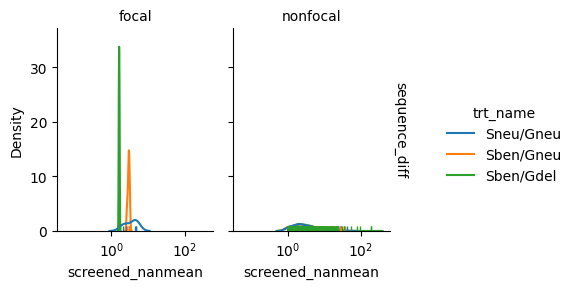

In [19]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.png


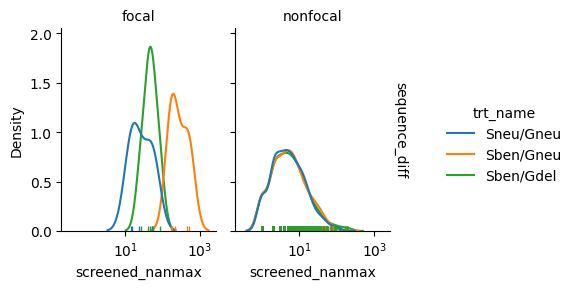

In [20]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.png


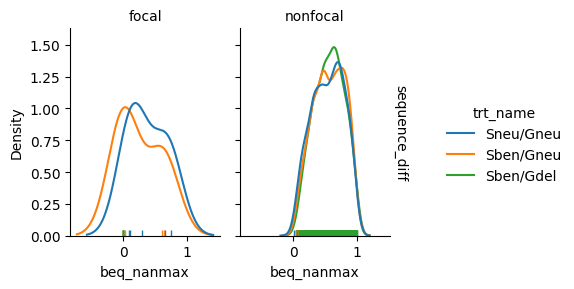

In [21]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.png


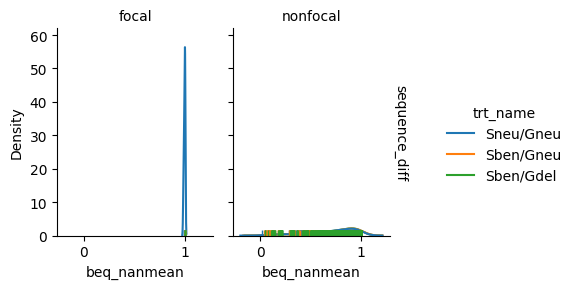

In [22]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


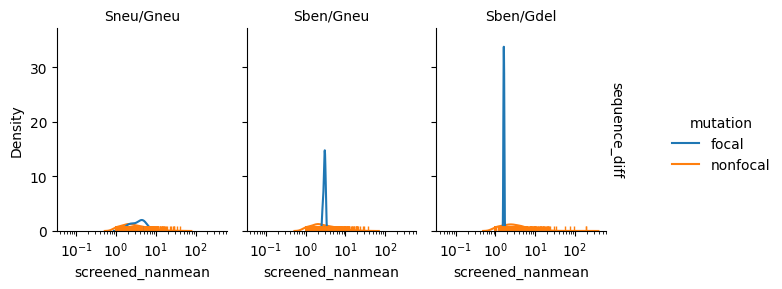

In [23]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.png


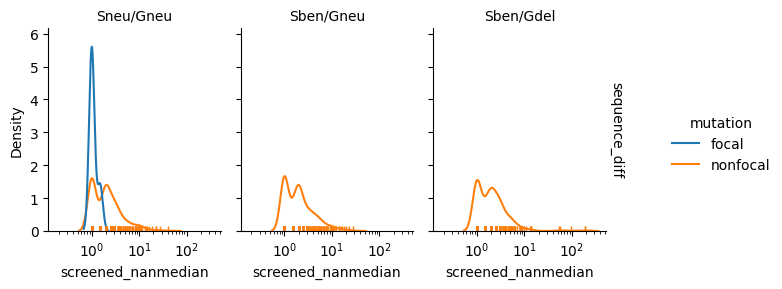

In [24]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmedian",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.png


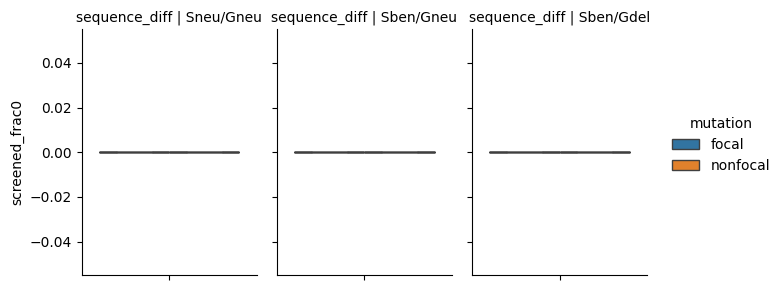

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.png


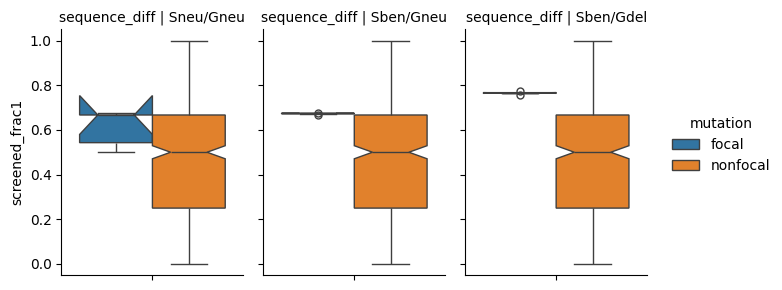

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.png


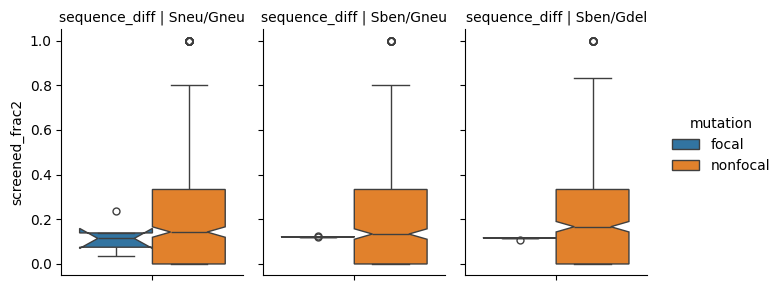

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.png


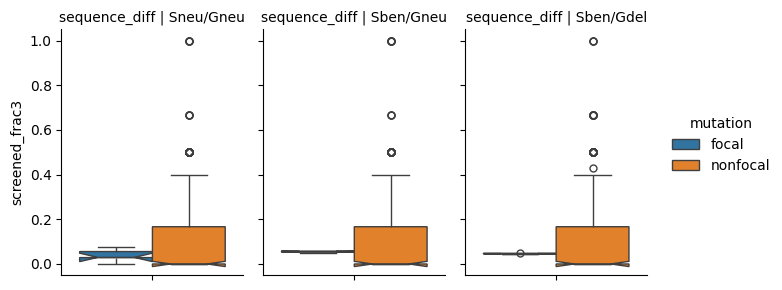

In [25]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for n in range(4):
        display(HTML(f"<h3>{min_leaves=} {n=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp[
                (grp["tb_stat"] == "num_leaves")
                & (grp["screen_name"] == "sequence_diff")
            ],
            y=f"screened_frac{n}",
            hue="mutation",
            row="screen_name",
            col="trt_name",
            kind="box",
            notch=True,
            aspect=0.75,
            height=3,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.tight_layout()
    break


In [26]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
1083466     18354  0.216018     2406     1226  3.589291e-01  4.101512e-01   
2387403     20155  0.237534      209      115  1.663794e-01  1.569470e-01   
2515840     12134  0.144709     3086     1504  1.657076e-01  6.791130e-02   
2387420     20155  0.237534     2060     1078  3.631466e-02  9.904379e-02   
127862      21489  0.253959     1358      996  0.000000e+00  0.000000e+00   
127874      21489  0.253959     2064     1097  4.507608e-03  1.032164e-01   
2387355     20155  0.237534     1252      721  8.731236e-08  3.604662e-15   
1083438     18354  0.216018     1411     1038  0.000000e+00  0.000000e+00   
1210377     11261  0.134115      738      278  2.140878e-11  1.382234e-10   
733644      12252  0.145639     1290      654  6.360025e-01  3.875197e-01   
127854      21489  0.253959     2402     1211  6.982655e-01  4.781444e-01   
844896      20664  0.242949     2078     1001  9.988990e-02  1.601851e-01   
1083420     18354  0.216018     1392     1077  0.000000e+00  0.000000e+00   
972101      12329  0.146678     2617     1232  2.958581e-03  4.311995e-04   
254754      12788  0.152937     9217     3483  0.000000e+00  0.000000e+00   
844842      20664  0.242949     2290     1113  1.879925e-01  4.065092e-01   
1083436     18354  0.216018     2208     1346  5.708079e-25  6.209395e-26   
606477      20365  0.239234      599      334  5.418944e-03  2.896842e-03   
606506      20365  0.239234     2089     1261  2.409215e-21  5.033394e-23   
733589      12252  0.145639      146       68  4.564822e-01  2.939495e-01   
1083479     18354  0.216018      569      285  1.000000e+00  4.180651e-01   
1210361     11261  0.134115      858      344  7.126482e-09  1.992142e-08   
844885      20664  0.242949     1045      473  2.416878e-03  3.477809e-06   
127848      21489  0.253959     5084     4075  0.000000e+00  0.000000e+00   
844874      20664  0.242949     3820     2271  1.269577e-31  1.121039e-44   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
1083466    clade growth ratio        2407  Sben/Gneu             0   
2387403    clade growth ratio         209  Sben/Gneu             0   
2515840  clade duration ratio        5849  Sben/Gneu             0   
2387420      clade size ratio        4113  Sben/Gneu             0   
127862       clade size ratio        1405  Sben/Gneu             0   
127874       clade size ratio        4088  Sben/Gneu             0   
2387355  clade duration ratio        1281  Sben/Gneu             0   
1083438      clade fblr ratio        1412  Sben/Gneu             0   
1210377      clade size ratio         869  Sben/Gneu             0   
733644       clade size ratio        1834  Sben/Gneu             0   
127854     clade growth ratio        2402  Sben/Gneu             0   
844896       clade size ratio        2316  Sben/Gneu             0   
1083420  clade duration ratio        1412  Sben/Gneu             0   
972101       clade fblr ratio        2646  Sben/Gneu             0   
254754     clade growth ratio       11036  Sben/Gneu             0   
844842   clade duration ratio        2316  Sben/Gneu             0   
1083436      clade fblr ratio        2209  Sben/Gneu             0   
606477       clade fblr ratio         599  Sben/Gneu             0   
606506       clade size ratio        2200  Sben/Gneu             0   
733589   clade duration ratio         312  Sben/Gneu             0   
1083479      clade size ratio         612  Sben/Gneu             0   
1210361    clade growth ratio         869  Sben/Gneu             0   
844885       clade size ratio        1120  Sben/Gneu             0   
127848     clade growth ratio        5084  Sben/Gneu             0   
844874     clade growth ratio        3821  Sben/Gneu             0   

         screened_nanmean  
1083466          0.002743  
2387403          0.004065  
2515840               NaN  
2387420          0.047170  
127862           0.899976  
127874           

In [27]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
254758      12788  0.152937     1887      947  8.901481e-01  9.025564e-01   
733616      12252  0.145639    63848    36362  0.000000e+00  0.000000e+00   
606473      20365  0.239234      534      286  1.092579e-01  3.384047e-02   
844858      20664  0.242949     1704      869  4.240507e-01  6.693150e-01   
2387359     20155  0.237534     2780     1681  1.967330e-28  1.072017e-34   
606485      20365  0.239234      220      121  1.566709e-01  2.386606e-01   
606502      20365  0.239234     4139     3161  0.000000e+00  0.000000e+00   
1210391     11261  0.134115    27916    13958  1.000000e+00           NaN   
844834      20664  0.242949     8088     6685  0.000000e+00  0.000000e+00   
1083471     18354  0.216018      211      115  2.151859e-01  2.270211e-01   
2515848     12134  0.144709    14782     7058  4.488038e-08  5.781530e-16   
2515868     12134  0.144709     3328     1442  1.467339e-14  9.881610e-22   
2515832     12134  0.144709    10747     5407  5.243552e-01  4.872378e-02   
606474      20365  0.239234     8457     6666  0.000000e+00  0.000000e+00   
844870      20664  0.242949     8225     6464  0.000000e+00  0.000000e+00   
2515880     12134  0.144709    10013     4559  3.889163e-19  3.274517e-23   
606466      20365  0.239234     4058     3144  0.000000e+00  0.000000e+00   
844865      20664  0.242949      187      104  1.433891e-01  3.181210e-01   
2387395     20155  0.237534     2832     1472  3.697650e-02  9.019316e-03   
606476      20365  0.239234     5117     4147  0.000000e+00  0.000000e+00   
127807      21489  0.253959     1173      688  3.374088e-09  6.426532e-17   
2387396     20155  0.237534     1837      924  8.155234e-01  5.368122e-01   
733637      12252  0.145639      250      107  2.665796e-02  1.022749e-03   
1210346     11261  0.134115      843      251  1.542504e-32  0.000000e+00   
2515890     12134  0.144709    55220    32528  0.000000e+00  0.000000e+00   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
254758     clade growth ratio        2044  Sben/Gneu             0   
733616       clade fblr ratio       69619  Sben/Gneu             0   
606473       clade fblr ratio         534  Sben/Gneu             0   
844858       clade fblr ratio        1706  Sben/Gneu             0   
2387359  clade duration ratio        2835  Sben/Gneu             0   
606485       clade fblr ratio         220  Sben/Gneu             0   
606502     clade growth ratio        4140  Sben/Gneu             0   
1210391      clade size ratio       31348  Sben/Gneu             0   
844834   clade duration ratio        8232  Sben/Gneu             0   
1083471    clade growth ratio         211  Sben/Gneu             0   
2515848      clade fblr ratio       17657  Sben/Gneu             0   
2515868    clade growth ratio        3371  Sben/Gneu             0   
2515832  clade duration ratio       17657  Sben/Gneu             0   
606474       clade fblr ratio        8461  Sben/Gneu             0   
844870     clade growth ratio        8232  Sben/Gneu             0   
2515880      clade size ratio       17657  Sben/Gneu             0   
606466   clade duration ratio        4140  Sben/Gneu             0   
844865       clade fblr ratio         187  Sben/Gneu             0   
2387395    clade growth ratio        2835  Sben/Gneu             0   
606476       clade fblr ratio        5118  Sben/Gneu             0   
127807   clade duration ratio        1201  Sben/Gneu             0   
2387396    clade growth ratio        1838  Sben/Gneu             0   
733637       clade size ratio         312  Sben/Gneu             0   
1210346      clade fblr ratio         900  Sben/Gneu             0   
2515890      clade size ratio       69243  Sben/Gneu             0   

         screened_nanmean  
254758      -1.000937e-03  
733616       4.028284e-03  
606473       2.756442e-03  
844858       5.263074e-04  
2387359      1.453861e-01  
606485       2.28

In [28]:
df.loc[
    (df["trt_name"] == "Sneu/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k   binom_p  mw_p_dropna  \
494141        149  0.001783       10        6  0.753906     0.564629   
1321415       163  0.001948        4        3  0.625000     0.818312   
494161        149  0.001783    26498    13249  1.000000          NaN   
3235841       128  0.001527    23676    11838  1.000000          NaN   
3474238        75  0.000902       11        4  0.548828     0.387655   
1321379       163  0.001948        1        1  1.000000     0.462742   
1321382       163  0.001948      102       53  0.766604     0.350199   
2867950       158  0.001868       29       20  0.061428     0.034968   
365806        264  0.003121       38       22  0.417692     0.794903   
2867923       158  0.001868       15        7  1.000000     0.780778   
3235791       128  0.001527        6        2  0.687500     0.294340   
57            291  0.003437       12        6  1.000000     0.859118   
18            291  0.003437       32       18  0.596615     0.282674   
3346536       114  0.001355       61       40  0.020415     0.006256   
1321377       163  0.001948        2        1  1.000000     0.975074   
3109262       229  0.002699       41       24  0.348889     0.463311   
36            291  0.003437       32       18  0.596615     0.451667   
494154        149  0.001783      106       32  0.000055     0.000007   
3109234       229  0.002699       11        5  1.000000     0.943197   
365790        264  0.003121       97       47  0.839214     0.225649   
3474253        75  0.000902        7        4  1.000000     0.692553   
3235818       128  0.001527       88       29  0.001824     0.000008   
1321418       163  0.001948       40       24  0.268187     0.555458   
2996590        99  0.001184        4        0  0.125000     0.168998   
3235812       128  0.001527        9        0  0.003906     0.000057   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
494141   clade duration ratio          24  Sneu/Gneu             0   
1321415    clade growth ratio           4  Sneu/Gneu             0   
494161       clade fblr ratio       27018  Sneu/Gneu             0   
3235841      clade size ratio       26396  Sneu/Gneu             0   
3474238  clade duration ratio          30  Sneu/Gneu             0   
1321379  clade duration ratio           4  Sneu/Gneu             0   
1321382  clade duration ratio         148  Sneu/Gneu             0   
2867950      clade size ratio          29  Sneu/Gneu             0   
365806     clade growth ratio          38  Sneu/Gneu             0   
2867923    clade growth ratio          15  Sneu/Gneu             0   
3235791  clade duration ratio          15  Sneu/Gneu             0   
57           clade size ratio          12  Sneu/Gneu             0   
18           clade fblr ratio          32  Sneu/Gneu             0   
3346536  clade duration ratio          62  Sneu/Gneu             0   
1321377  clade duration ratio           7  Sneu/Gneu             0   
3109262      clade size ratio          50  Sneu/Gneu             0   
36         clade growth ratio          32  Sneu/Gneu             0   
494154       clade fblr ratio         107  Sneu/Gneu             0   
3109234      clade fblr ratio          11  Sneu/Gneu             0   
365790       clade fblr ratio          97  Sneu/Gneu             0   
3474253      clade fblr ratio           7  Sneu/Gneu             0   
3235818    clade growth ratio          89  Sneu/Gneu             0   
1321418    clade growth ratio          44  Sneu/Gneu             0   
2996590  clade duration ratio          10  Sneu/Gneu             0   
3235812    clade growth ratio           9  Sneu/Gneu             0   

         screened_nanmean  
494141      -1.308934e-02  
1321415     -9.084185e-04  
494161      -7.889660e-19  
3235841      4.306972e-18  
3474238               NaN  
1321379      2.382754e-02  
1321382               NaN  
2867950      8.574640e-01  
365806       3.161631e-04  
2867923     -3.038756e-03  
3235791